<font size="6"><b>LOST IN INFORMATION: INFORMATION THEORY AND ENTROPY</b></font>

<font size="5"><b>Serhat Çevikel</b></font>

In [ ]:
library(data.table)
library(tidyverse)
library(gtools)
library(estimators) # for theoretical moments
library(moments) # empirical moments
library(DescTools) # entropy
library(BBmisc)
library(plotly)
library(rlist)
library(markovchain)

In [ ]:
options(repr.matrix.max.rows=20, repr.matrix.max.cols=15) # for limiting the number of top and bottom rows of tables printed 

![entropy](../imagesba/dynamic_entropy.png)

(https://xkcd.com/2318/)

You may ask why **entropy**, a concept mostly attributed to physics area and is closely related to **disorder**, takes part in our course.

As you will we will correct the misconceptions around the term entropy and emphasize its central role in understanding major topics in probability. In previous notebooks, we have seen the **how** and **what** of the convergence of stochastic processes to certain probability distribution. Entropy tells the **why** of this convergence phenomena.

The entropy that we will talk about here is the information theoretic interpretation of entropy, as defined by computer scientist Claude Shannon in 1948.

The ideas, flow and most simulations in this notebook borrow largely from two great, concise and comprehensible books by Ariel Ben-Naim:

- Entropy Demystified The Second Law Reduced to Plain Common Sense with Seven Simulated Games (2008)s
- Discover Entropy and the Second Law of Thermodynamics A Playful Way of Discovering a Law of Nature (2010)

First let's see how public perceives what entropy is about. For this, I asked your dear friend ChatGPT:

> Can you create a picture about public's understanding of the concept of "entropy"

<img src="../imagesba/entropy_gpt.png" width="500"/>

So public perceives *entropy* synonymous with *disorder*. Let's watch a real processes and see whether it evolves to disorder...

Let's start with a question. Which The Rolling Stones song features in the ending credits of two great movies?

This is from Full Metal Jacket by Stanley Kubrick:

[![fmj](https://img.youtube.com/vi/3jlhiweVZ1I/0.jpg)](https://youtu.be/3jlhiweVZ1I)

And this is from Devil's Advocate by Taylor Hackford, starring Al Pacino, Keanu Reeves and Charlize Theron:

[![da](https://img.youtube.com/vi/G3jaPBFXFTU/0.jpg)](https://youtu.be/G3jaPBFXFTU?t=25)

Paint It Black... Definitely one of my favorite Stones tunes. Now let's paint two glasses of pure water with dark - albeit not black - ink:

[![ink](https://img.youtube.com/vi/AEaya0F3_hw/0.jpg)](https://youtu.be/AEaya0F3_hw)

I have taken to snapshots from the video, one from the middle, other from towards the end. So the question is which one seems more disordered:

<table>
<tr>
<th> This one: </th>
<th> Or that: </th>
</tr>
<tr>
<td>

<img src="../imagesba/ink1.jpg" width="600"/>
</td>
<td>

<img src="../imagesba/ink2.jpg" width="600"/>

</td>
</tr>
</table>

Well I guess you think the first one seems more *disordered*. Now the second question is more technical: Which one seems to have a higher degree of entropy?

If you think *disorder* goes along with *entropy* you may choose *the first snapshot* to have more entropy but it is wrong! Second snapshot with a smooth colored look has more entropy. So natural processes left alone evolves into *higher entropy* but not necessarily *higher disorder*.

Two great videos by *James J. Orgill* in his YouTube channel The Action Lab show by other real experiments that physical phenomena when left to shuffle randomly may evolve into a more orderly state:

**The Mysterious Entropic Force:**

[![tal1](https://img.youtube.com/vi/LBRBB6D8SdY/0.jpg)](https://youtu.be/LBRBB6D8SdY)

**How Entropy Creates Order— They Thought It Was Impossible:**

[![tal2](https://img.youtube.com/vi/-P2rMk3bfkc/0.jpg)](https://youtu.be/-P2rMk3bfkc)

I asked old friend ChatGPT to learn about this public misconception on the meaning of entropy:

"Why entropy is related to disorder while in reality it is not about disorder?"

And here is the answer:

That’s a sharp question — you’re right: the popular slogan *“entropy = disorder”* is misleading. It’s more of a teaching shortcut than the actual meaning. Let me unpack why:

---

Why people say “entropy = disorder”

* In **everyday examples** (ice melting, gas spreading out, your room getting messy), entropy tends to increase when systems become more "spread out" or "less ordered."
* This gave rise to the oversimplification: **order → disorder**.

---

What entropy really is

1. **Statistical mechanics definition (Boltzmann):**
   [$S = k_B \ln \Omega$]
   where ($\Omega$) is the number of microscopic configurations (microstates) consistent with the macroscopic state (macrostate).
   → Entropy is about **counting possibilities**.

2. **Information theory definition (Shannon):**
   [$H = - \sum p(x) \log p(x)$]
   where (p(x)) are probabilities of outcomes.
   → Entropy is the **average uncertainty** or "missing information" about the exact state.

---

Why “disorder” is misleading

* **“Disorder” is subjective.** A shuffled deck of cards looks "disordered" to us, but from an entropy standpoint, it’s just one microstate among many.
* **High entropy ≠ messiness.** For example, a crystal at high temperature still has high entropy even though it “looks ordered.”
* **Low entropy ≠ neatness.** A perfect gas uniformly spread in a container looks “neat” and symmetric, but that’s actually maximum entropy.

---

✅ **Better way to say it:**
Entropy measures **how many microscopic ways a system can be arranged without changing what we see macroscopically**, or equivalently, **how much information we lack about its exact state**.

---

Entropy can be summarized as the degree of missing information about the exact or specific configuration of the system.

When there are more specific configurations to arrive at an overall state, that means there is a higher probability to be in that state.

There is a higher chance that a system may end up in a state with higher probability - just by reasoning with common sense. Such a state will have more specific configurations so there will be less information about the specific configuration.

SO HIGHER ENTROPY MEANS HIGHER LEVEL OF MISSING INFORMATION AND A SYSTEM HAS A HIGHER CHANCE TO EVOLVE INTO A STATE WITH:

- HIGHER PROBABILITY
- HIGHER MISSING INFORMATION
- HIGHER ENTROPY

I know, these ideas are vague in your mind. But we will clarify each of them one by one and at the end of this notebook you will understand why a system naturally evolves into those certain shapes that we call as "probability distributions" as a result of ever increasing entropy and how different constraints on the system result in different shapes.

# Missing Information and Shannon's Entropy

## 20Q Game

Following the example from Ben-Naim (2008, p52), let's play a simple game:

Suppose I chose a certain person, e.g. Einstein, and you have to find out who the person is by asking binary questions (answers can be Yes or No).

There are two possible strategies:

- Dumb strategy: Ask for specific persons, you have a very small chance to win at the first try but on average you may end up with billions of questions
- Smart strategy: Ask questions so that with each subsequent answer you halve the possible search space

The dumb strategy questions may be:

- Is it Nixon?
- Is it Gandhi?
- Is it me?
- Is it Marilyn Monroe?
- Is it John Wayne? (I added that, SÇ)
- Is it you?
- Is it Mozart?
- Is it Niels Bohr?
- ...

I remember a scene from Full Metal Jacket again:

[![fmj2](https://img.youtube.com/vi/rgIeru8ZD94/0.jpg)](https://youtu.be/rgIeru8ZD94)

With each answer, we don't gain much INFORMATION: The search space of millions of possibilities is reduced one-by-one.

Now let's how we can follow smart strategy:

- Is the person a male?
- Is he alive?
- Is he in politics?
- Is he a scientist?
- Is he very well-known?
- Is he Einstein?

And you got it!

So at the beginning that person may be any of the millions of known persons in the World so you have little information in the beginning.

With each subsequent answer, you gain MORE INFORMATION about who that person can be, because a large portion of the possible answers are eliminated in each step and we are less with a smaller search space.

Now let's play a real 20Q game several times. There are some alternative websites for that game. I chose [20Q.net](http://www.20q.net)

Can 20Q.net guess the clumsy and sometimes annoying character from Star Wars right?

[![jarjar](https://img.youtube.com/vi/_-Q6CdpVUTM/0.jpg)](https://youtu.be/_-Q6CdpVUTM)

<table border="0" cellpadding="6" cellspacing="1" width="100%">
<tbody><tr valign="top"><td width="90%" align="left">
<table align="left" border="0" cellspacing="4" cellpadding="4" bgcolor="#F4F0D8"><tbody><tr><td>
<big><b>Q29. &nbsp;I am guessing that it is Jar Jar Binks?<br>
<nobr><a href="/gse?iVopep9AP3XTiXnXEAJAoSRZJyi!en_yLVLg.BhARZGLgilq8RY39fLTSXF-uhrD2STDpXyYLGcqng-5eNuSbMf_3TYdp-2j3c4rmQ.,Q2DaZvWi,3B3Pb3bKjKAk0giFUmk6x!jJ_Z_bDIzGuMh_sZ0bGn7fGbqx9rDpRSVIp!j4-I-cbQgZ7X4rx!B_skF1KMt3hgtZ0beqh__e">Right</a>, <a href="/gse?kmGkDAeMn2SL8S0SXMhMbHE3hg8JD0xgf7fvj,tME3Tfv8isQE12eufLHSd9KtCBkHLBASg1fTGs0v96DoKHpZux2L1IA9k!2GNCVcjmckB435W8m2,2np2pl!lMUqv8drVUR_J!hx3xpBaPTKZtx-3qpT0FuTps_eCBAEH7aAJ!N9a9Gpcv3FSNC_J,x-UdwlZ.2y-jhaBV_y!!W">Wrong</a>, <a href="/gse?Vj_8MqEzD2_CX_,_6zazTwrGaQX8M,NQH!H9kUBzrGsH9XejOr-2E0HCw_3LJBvVIwCVq_Q-HsKj,9LAMRJw1Z0N2C-cqLIg2KuvyikhiIVfGPnXh2U2D1217g7z4x9X3by4oW8gaNGN1Vl5sJZBN.Gx1s,Y0s1jWEvVqrw!lq8guLlLK1i9GY_uvW8UN.43d7Zt21TC_uUdc1rri"> Close </a> </nobr><br>
</b></big><hr align="center" width="90%">
<table border="0" cellspacing="0" cellpadding="0">
<tbody><tr><td align="right">28.</td><td>&nbsp;&nbsp;</td><td>Are they a Jedi?<a href="/gse?gRbeWe95.qFLnFdFY5I5g71aIEn4WdiEUCUoOkj51awUon8Zv1-q93UL7FrlVjXzc7LzeFE-Uw0ZdolTWJV7_P3iqL-selcBq0uXNAOMAczfa2GnMqkq._q_6B65!xonrKN!RH4BIiai_zSDwVPjipax_wdy3w_ZH9Xze17CSe4BulSl0_AoayFuXH4kip!p1v5f4pTwMv"> <b>No</b></a>.
</td></tr>
<tr><td align="right">27.</td><td>&nbsp;&nbsp;</td><td>Are they short?<a href="/gse?wBv3pcCNaiVS1VLV2NWN!fsxWU1EpLdUy0yFw_,NsxGyF1hrRs7iCHySfVPJO,lZ3fSZcVU7yGerLFJXpKOfMoHdiS7vcJ3-ieYl.TwDT3Ztxqj1Di_iaMiMu-uNQ9F1Pm.QInE-WdxdMZB5GOo,dgx9MGL4HGMrnClZcsf0BcE-YJBJeMTFx4VjrovMufm_rahqy_U!3!"> <b>No</b></a>.
</td></tr>
<tr><td align="right">26.</td><td>&nbsp;&nbsp;</td><td>I guessed that it was Meebur Gascon?<a href="/gse?A3Mtx7uc2WeYzeQeVc9ckmrn9Jz5xQoJZ6Z-4S_crnUZ-zCTjr0WuLZYmeAif_sptmYp7eJ0ZU1TQ-iwxKfm,vLoWY0d7it8W1PsND4MDtp.nHOzMWSW2,W,l8lchB-zAyNhaF589ono,pgXUfv_oRnB,UQILU,TFusp7rm6g758PiQmLphanH-UrtrnwU,sZSJkVsIt7O"> <b>Wrong</b></a>.
</td></tr>
<tr><td align="right">25.</td><td>&nbsp;&nbsp;</td><td>Are they a villain? <b>No</b>.
</td></tr>
<tr><td align="right">24.</td><td>&nbsp;&nbsp;</td><td>Could they be found in Jabba's Palace? <b>No</b>.
</td></tr>
<tr><td align="right">23.</td><td>&nbsp;&nbsp;</td><td>I guessed that it was Elan Sel'Sabagno <small>(Sleazebaggano)</small>? <b>Wrong</b>.
</td></tr>
<tr><td align="right">22.</td><td>&nbsp;&nbsp;</td><td>Are they diplomatic? <b>No</b>.
</td></tr>
<tr><td align="right">21.</td><td>&nbsp;&nbsp;</td><td>Could they be a hero? <b>Sometimes</b>.
</td></tr>
<tr><td align="right">20.</td><td>&nbsp;&nbsp;</td><td>I guessed that it was Darth Maul? <b>Wrong</b>.
</td></tr>
<tr><td align="right">19.</td><td>&nbsp;&nbsp;</td><td>Were they killed by a Sith? <b>No</b>.
</td></tr>
<tr><td align="right">18.</td><td>&nbsp;&nbsp;</td><td>Are they located on Tatooine? <b>No</b>.
</td></tr>
<tr><td align="right">17.</td><td>&nbsp;&nbsp;</td><td>I guessed that it was Bib Fortuna? <b>Wrong</b>.
</td></tr>
<tr><td align="right">16.</td><td>&nbsp;&nbsp;</td><td>Can they live underwater? <b>No</b>.
</td></tr>
<tr><td align="right">15.</td><td>&nbsp;&nbsp;</td><td>Are they a pilot? <b>No</b>.
</td></tr>
<tr><td align="right">14.</td><td>&nbsp;&nbsp;</td><td>Has it been redesigned? <b>No</b>.
</td></tr>
<tr><td align="right">13.</td><td>&nbsp;&nbsp;</td><td>Are they large? <b>No</b>.
</td></tr>
<tr><td align="right">12.</td><td>&nbsp;&nbsp;</td><td>Do they cause unease? <b>Yes</b>.
</td></tr>
<tr><td align="right">11.</td><td>&nbsp;&nbsp;</td><td>Are they female? <b>No</b>.
</td></tr>
<tr><td align="right">10.</td><td>&nbsp;&nbsp;</td><td>Are they male? <b>Yes</b>.
</td></tr>
<tr><td align="right">9.</td><td>&nbsp;&nbsp;</td><td>Were they enslaved? <b>Yes</b>.
</td></tr>
<tr><td align="right">8.</td><td>&nbsp;&nbsp;</td><td>Have they been to Tatooine? <b>Yes</b>.
</td></tr>
<tr><td align="right">7.</td><td>&nbsp;&nbsp;</td><td>Do they have wings? <b>No</b>.
</td></tr>
<tr><td align="right">6.</td><td>&nbsp;&nbsp;</td><td>Is it built from salvaged parts? <b>No</b>.
</td></tr>
<tr><td align="right">5.</td><td>&nbsp;&nbsp;</td><td>Can they speak Basic <small>(common language)</small>? <b>Yes</b>.
</td></tr>
<tr><td align="right">4.</td><td>&nbsp;&nbsp;</td><td>Are they known for destroying things? <b>No</b>.
</td></tr>
<tr><td align="right">3.</td><td>&nbsp;&nbsp;</td><td>Are they a good teacher? <b>No</b>.
</td></tr>
<tr><td align="right">2.</td><td>&nbsp;&nbsp;</td><td>Are they Human? <b>No</b>.
</td></tr>
<tr><td align="right">1.</td><td>&nbsp;&nbsp;</td><td>It is classified as <b>Being</b>.</td></tr>
</tbody></table>
</td></tr></tbody></table>
</td><td width="10%" align="center">
<table border="0" width="100%" cellpadding="4" cellspacing="4">
<tbody><tr><td bgcolor="#D0C0A8" width="100%" align="center"><a href="/gse?c1LAKArC.y-uZ-0-ECVCgW,_VqZTK0!qLiLO6NnC,_mLOZj9I,kyrMLuW-bvxn3YPWuYA-qkLm190OvHKcxWfBM!yuk7AvPay1o3S56X5PYh_8FZXyNy.fyfwawCRJOZbtSRl2TaV!_!fYpemxBn!Q_Jfm0UMmf92r3YA,WipATaovpv1f5O_U-o32TN!QRbDwBGIRnCV09nRa-,k.yfD_vUM1LF-!U83Yf9OQFFf" target="mainFrame"><font color="#000033"><font size="+3"><b>?</b></font></font></a></td></tr></tbody></table>
</td></tr><tr valign="top"><td align="center" colspan="2">
<br>&nbsp;<br>
<div class="smallcopyright">
STAR WARS and all related characters and elements are trademarks of and © Lucasfilm Ltd.<br>
20Q/5.01c, WebOddity/1.19b &nbsp; &nbsp; 
© 1988-2007, 20Q.net Inc., all rights reserved
</div>
</td></tr></tbody></table>

Now, let 20Q.net guess Mr. Slowhand:

[![slowhand](https://img.youtube.com/vi/_ZoNt_J3G3w/0.jpg)](https://youtu.be/_ZoNt_J3G3w)

<table border="0" cellpadding="6" cellspacing="1" width="100%">
<tbody><tr valign="top"><td width="90%" align="left">
<table align="left" border="0" cellspacing="4" cellpadding="4" bgcolor="#F4F0D8"><tbody><tr><td>
<big><b>Q17. &nbsp;I am guessing that it is Eric Clapton?<br>
<nobr><a href="/gse?xgCJyWkwAq_J.EqEYy6kTnhQYl3!rT4l8,N2Kl42Wx0OL3eRq51nAINjUfZ_6qKLmUHtJ4O8_h4nAIDHPCXLjUhb2koUA6vPxOhiy0SuBHG8_SYS!1xDT_,D1r3HP5twJKqFE5,OOq">Right</a>, <a href="/gse?S8HKbKN.!zkTYCzCDbZNxEJjDcrGsxwcStp4Mcw4Klo61rvXzPeE!np0fWHkZzM1-f79Tw6SkJwE!n57Vgm10fJQ4NAf!ZuVl6Jibo,qO7BSk,D,Gel5xkt5esr7VgK56r!GpgIQQu">Wrong</a>, <a href="/gse?1rhq0XU7!w.Pkbwbe06UdzFJeqsGDd_qElp4Lq_4XnTKWsOBwu1z!Cp8RQ-.6wLWZRNVP_KE.F_z!CtNS9aW8RF34UyR!6vSnKFM0TfroNcE.fefG1ntd.lt1DsNSw163dvzywCVVX"> Close </a> </nobr><br>
</b></big><hr align="center" width="90%">
<table border="0" cellspacing="0" cellpadding="0">
<tbody><tr><td align="right">16.</td><td>&nbsp;&nbsp;</td><td>Do you lead a group?<a href="/gse?rj30AMTmw31Y,I3IJA9TSkWOJ5X70Sr5pEsK_5rKMnUvlXaN36gkwfsF-be193_lG-4QYrvp1Wrkwf24.uBlF-WhKTV-w9C.nvWiAUtdD4qp1tJt7gn2S1P7suNbl1rVVv"> <b>Sometimes</b></a>.
</td></tr>
<tr><td align="right">15.</td><td>&nbsp;&nbsp;</td><td>Do you have long hair?<a href="/gse?6HFq,PCLsKopD6K60,wCm!WH0ZqbemaZ1v4nkZanPV2SUqY3KzR!sJ4f.xXowKkU_.ldpaS1oWa!sJTlGFiUf.WhnCE.swMGVSWQ,25Ajlc1ou23BzvsRpMyFxhDopZKKB"> <b>No</b></a>.
</td></tr>
<tr><td align="right">14.</td><td>&nbsp;&nbsp;</td><td>Are you a sell out?<a href="/gse?eHJfYz5mrj1fAujuUYy5,MpZUJgdL,sJQehFKJsFzxCWOg.ljNvMr3hTSDI1yjKO9S74fsWQ1psMr3q76V0OTSpiF5nSryb6xWpGYC_k86Ml7r58K.Mphyl72Uh_TyI113"> <b>Yes</b></a>.
</td></tr>
<tr><td align="right">13.</td><td>&nbsp;&nbsp;</td><td>Do you have a keyboard? <b>No</b>.
</td></tr>
<tr><td align="right">12.</td><td>&nbsp;&nbsp;</td><td>Were you part of the British Invasion? <b>Yes</b>.
</td></tr>
<tr><td align="right">11.</td><td>&nbsp;&nbsp;</td><td>Do you have big hair? <b>No</b>.
</td></tr>
<tr><td align="right">10.</td><td>&nbsp;&nbsp;</td><td>Are you known for your unusual appearance? <b>No</b>.
</td></tr>
<tr><td align="right">9.</td><td>&nbsp;&nbsp;</td><td>Do you perform the Blues? <b>Yes</b>.
</td></tr>
<tr><td align="right">8.</td><td>&nbsp;&nbsp;</td><td>Do you play electric guitar? <b>Yes</b>.
</td></tr>
<tr><td align="right">7.</td><td>&nbsp;&nbsp;</td><td>Did you die an untimely death? <b>No</b>.
</td></tr>
<tr><td align="right">6.</td><td>&nbsp;&nbsp;</td><td>Are you from Hawaii? <b>No</b>.
</td></tr>
<tr><td align="right">5.</td><td>&nbsp;&nbsp;</td><td>Are you American? <b>No</b>.
</td></tr>
<tr><td align="right">4.</td><td>&nbsp;&nbsp;</td><td>Are you more than one person? <b>No</b>.
</td></tr>
<tr><td align="right">3.</td><td>&nbsp;&nbsp;</td><td>Do you play an instrument? <b>Yes</b>.
</td></tr>
<tr><td align="right">2.</td><td>&nbsp;&nbsp;</td><td>Are you featured in a movie? <b>Yes</b>.
</td></tr>
<tr><td align="right">1.</td><td>&nbsp;&nbsp;</td><td>It is classified as <b>Person</b>.</td></tr>
</tbody></table>
</td></tr></tbody></table>
</td><td width="10%" align="center">
<table border="0" width="100%" cellpadding="4" cellspacing="4">
<tbody><tr><td bgcolor="#D0C0A8" width="100%" align="center"><a href="/gse?egq_8-Iq!14dAr1rh8pIK_RjhBC3VKnBfkZOGBnO-Xc,tCEo1ve_!2ZwW904p1GtlWmPdn,f4Rn_!2Umg7NtwWRSOIxW!pbgX,RH8cs5zmTf4shs3eXUK4kUeVCmVyvf,LrvyG8zanLbtutg4841_R5q-C!LZOmpzQ" target="mainFrame"><font color="#000033"><font size="+3"><b>?</b></font></font></a></td></tr></tbody></table>
</td></tr><tr valign="top"><td align="center" colspan="2">
<br>&nbsp;<br>
<div class="smallcopyright">
20Q/5.01c, WebOddity/1.19b &nbsp; &nbsp; 
© 1988-2007, 20Q.net Inc., all rights reserved
</div>
</td></tr></tbody></table>

And let 20Q.net guess **THE GREATEST HERO** of our nation:

[![ataturk](https://img.youtube.com/vi/NcXWk0yU_Oc/0.jpg)](https://youtu.be/NcXWk0yU_Oc)

<table border="0" cellpadding="6" cellspacing="1" width="100%">
<tbody><tr valign="top"><td width="90%" align="left">
<table align="left" border="0" cellspacing="4" cellpadding="4" bgcolor="#F4F0D8"><tbody><tr><td>
<big><b>Q26. &nbsp;I am guessing that it is Mustafa Kemal Atatürk?<br>
<nobr><a href="/gse?8AchXfwtWH_GOZvZsSNX_GL6tjwbhIhWc7b1,fH6MJ_24SdCu4.20j!jyLkpMIzsgcrxK!g84Syw9sHT,fwFsWE8j9nhWYvMvNI95CiVnZoj5dLuM.kuZhjQYt0aLqiUXCefySywO5subS9n!tni,MvMHk.UCZ0akiSR-n756j!giLdcTyK5kGxhRiLYZhiU-n7QCXywIQFQ_BbbE">Right</a>, <a href="/gse?kRRXkzPA3R,.VODOCnKk,.IWA!PFBoB37NF2ZzRWcq,GsnQfrsXG6!v!eI9dcobCg71M4vgjsnePLCRpZzPyC35j!LJB3SDcDKoLufmEJO0!uQIrcX9rOB!lSA6iItmxkf_zenePVuCrFnLJvAJmZcDcR9XxfO6i9mn8TJNuW!vgmIQ7pe4u9.MB8mISOBmxTJ!H_WwK9HFHOzkky">Wrong</a>, <a href="/gse?9lq-5-dPF60jQ7m7Wqx50ja,PndDGNGFUYDwy-6,Ar09lq4XblH9cnTnZaOhANMWVU!skTVLlqZdEW6Cy-dKWFoLnERGFfmAmxNE2X1gR7en24abAHOb7GnJfPc_aI1t5Xz-ZqZdQ2WbDqERTPR1yAmA6OHtX7c_O1quiRY2,nTV1a4UCZk2OjsGu1af7G1tiRqDgarSnDdDe5xxh"> Close </a> </nobr><br>
</b></big><hr align="center" width="90%">
<table border="0" cellspacing="0" cellpadding="0">
<tbody><tr><td align="right">25.</td><td>&nbsp;&nbsp;</td><td>Do you have blue eyes?<a href="/gse?nAvT1QGV7vi,CDTDZUS1i,6tV5G8ndn7Hl8!BQvt2mi.bUWzNbR.w5Y5J6Mo2d4ZuHhyXYuabUJGKZvjBQGLZ7pa5Ken73T2TSdKgzPIeDF5gW6N2RMNDn5E3VwO60Pr1z-QJUJGCgZN8UKeYVePB2T2vMRrzDwOMPUAqelgt5YuP6WHjJXgM,ynAPW8FDwH3vymIGu"> <b>Yes</b></a>.
</td></tr>
<tr><td align="right">24.</td><td>&nbsp;&nbsp;</td><td>Are you on television?<a href="/gse?Pg5JjoVtIXxd3,v,1qfjxdigtwVeJ.JI0FeQSoXgDOxRGqmlhGCRpw-wZi2zD.y1W0sHT-WUGqZVr1X8SoVb1IMUwrNJIAvDvf.rEl7cN,!wEmihDC2h,JwYAtp4iu7KjlPoZqZV3E1heqrN-tN7SDvDX2CKl,p427qnaNFEgw-W7im08cL3lRFL9QvwjoVFtKbYr-5"> <b>No</b></a>.
</td></tr>
<tr><td align="right">23.</td><td>&nbsp;&nbsp;</td><td>I guessed that it was Michael Collins <small>(Irish Leader)</small>?<a href="/gse?dC_BrkN9Fvsya!B!o7drsyLP9tNWUmUFnKW.GkvPwqspx7-,Qx6p3t_t1LOJwmXoDn8Tu_DRx71NiovcGkNboFlRtizUFIBwBdmiY,fCz!EtY-LQw6OQ!UtSI93AL4fjr,Zk171NaYoQW7iz_9zfGwBwvO6j,!3AOf70MzKYAs7bZxMBF19cprd78U7bAs8yDVvcGwa"> <b>Wrong</b></a>.
</td></tr>
<tr><td align="right">22.</td><td>&nbsp;&nbsp;</td><td>Are you involved in politics? <b>Yes</b>.
</td></tr>
<tr><td align="right">21.</td><td>&nbsp;&nbsp;</td><td>Do you have children? <b>No</b>.
</td></tr>
<tr><td align="right">20.</td><td>&nbsp;&nbsp;</td><td>I guessed that it was Josip Broz Tito? <b>Wrong</b>.
</td></tr>
<tr><td align="right">19.</td><td>&nbsp;&nbsp;</td><td>Were you born before the 1500s? <b>No</b>.
</td></tr>
<tr><td align="right">18.</td><td>&nbsp;&nbsp;</td><td>I guessed that it was Boyko Borisov? <b>Wrong</b>.
</td></tr>
<tr><td align="right">17.</td><td>&nbsp;&nbsp;</td><td>Are you a heart-throb? <b>No</b>.
</td></tr>
<tr><td align="right">16.</td><td>&nbsp;&nbsp;</td><td>Are you female? <b>No</b>.
</td></tr>
<tr><td align="right">15.</td><td>&nbsp;&nbsp;</td><td>Were you born before the year 1800? <b>No</b>.
</td></tr>
<tr><td align="right">14.</td><td>&nbsp;&nbsp;</td><td>Are you a martial artist? <b>No</b>.
</td></tr>
<tr><td align="right">13.</td><td>&nbsp;&nbsp;</td><td>Have you made a famous discovery? <b>No</b>.
</td></tr>
<tr><td align="right">12.</td><td>&nbsp;&nbsp;</td><td>Have you won awards? <b>No</b>.
</td></tr>
<tr><td align="right">11.</td><td>&nbsp;&nbsp;</td><td>Were you born between 1900-1950? <b>No</b>.
</td></tr>
<tr><td align="right">10.</td><td>&nbsp;&nbsp;</td><td>Are you associated with racing? <b>No</b>.
</td></tr>
<tr><td align="right">9.</td><td>&nbsp;&nbsp;</td><td>Are you known as a hero? <b>Yes</b>.
</td></tr>
<tr><td align="right">8.</td><td>&nbsp;&nbsp;</td><td>Are you British? <b>No</b>.
</td></tr>
<tr><td align="right">7.</td><td>&nbsp;&nbsp;</td><td>Are you associated with fighting? <b>No</b>.
</td></tr>
<tr><td align="right">6.</td><td>&nbsp;&nbsp;</td><td>Are you associated with evil? <b>No</b>.
</td></tr>
<tr><td align="right">5.</td><td>&nbsp;&nbsp;</td><td>Do you have facial hair? <b>No</b>.
</td></tr>
<tr><td align="right">4.</td><td>&nbsp;&nbsp;</td><td>Are you under 40 years old? <b>No</b>.
</td></tr>
<tr><td align="right">3.</td><td>&nbsp;&nbsp;</td><td>Are you European? <b>Yes</b>.
</td></tr>
<tr><td align="right">2.</td><td>&nbsp;&nbsp;</td><td>Are you associated with music? <b>No</b>.
</td></tr>
<tr><td align="right">1.</td><td>&nbsp;&nbsp;</td><td>Are you a movie star? <b>No</b>.
</td></tr>
</tbody></table>
</td></tr></tbody></table>
</td><td width="10%" align="center">
<table border="0" width="100%" cellpadding="4" cellspacing="4">
<tbody><tr><td bgcolor="#D0C0A8" width="100%" align="center"><a href="/gse?ED1kg.Q2VdZOEpTp7y8gZOYW2_QMFlFVcsMje.dWNkZnRywDXR9nG_1_bYhPNli76c4u-16IRybQC7dze.Q37V0I_CHFVtTNT8lCrDJKHpU_rwYXN9hXpF_!t2G5YqJxgDf.bybQEr7XMyCH12HJeNTNdh9xDpG5hJyLaHsrW_16JYwczb-rhOuFLJYtpFJxaHzeYWoyrNQMFIrgbJRM9.e4t2W1ri46ZOMjNk11b" target="mainFrame"><font color="#000033"><font size="+3"><b>?</b></font></font></a></td></tr></tbody></table>
</td></tr><tr valign="top"><td align="center" colspan="2">
<br>&nbsp;<br>
<div class="smallcopyright">
20Q/5.01c, WebOddity/1.19b &nbsp; &nbsp; 
© 1988-2007, 20Q.net Inc., all rights reserved
</div>
</td></tr></tbody></table>

## Finding the hidden marble

Suppose we want to find a marble hidden in one of the closed boxes, similar to a "find the black card" game, featured in Turkish movies:

[![bulkara1](https://img.youtube.com/vi/xWjPxnlxUuc/0.jpg)](https://youtu.be/xWjPxnlxUuc)

[![bulkara2](https://img.youtube.com/vi/uVt-wCDGLWI/0.jpg)](https://youtu.be/uVt-wCDGLWI)

Here in each step we will ask whether the location of the hidden marble is before or after the middle point of remaning options. So our algorithm works like a binary search tree:

[![binary](https://img.youtube.com/vi/ndmhR1MLdJ8/0.jpg)](https://youtu.be/ndmhR1MLdJ8)

We can also illustrate the steps as such:

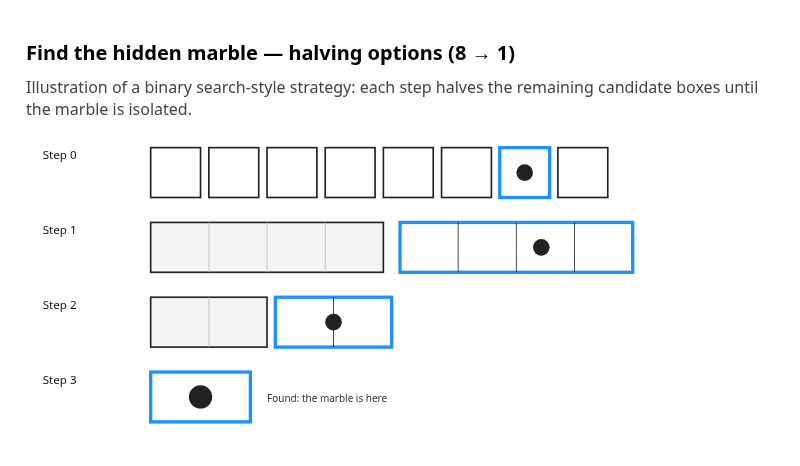

### Equiprobable case

With eight boxes, it takes us three steps to find the marble. 3 steps is also obvious from the fact that:

In [ ]:
log2(8)

Now let's create a simulation code where we select the number of boxes and number of repetitions of the game to get the average number of steps to find the hidden marble.

We don't have to keep separate values for all possible boxes. Since the remaining alternatives are all contiguous boxes, it is sufficient to track the minimum and maximum indices of those boxes.

We want to learn the total number of steps to isolate the box with the hidden marble. So we need four arguments: The index of the box holding the coin, first and last indices of the remaining boxes and the number of iterations (questions) so far.

Here is the simple recursive function for that:

In [ ]:
findmarble <- function(placex, firstx = 1, lastx, iterx = 0)
{    
    if(firstx == lastx) return(iterx) # if there is one index remaning no further questions
    cutx <- floor(mean(c(firstx, lastx))) # the half point in between the indices
    
    if(placex %between% c(firstx, cutx)) # if the coin is in the first half
    {
        # recurse the function where the right index is replaced with the cut point and iteration is incremented
        findmarble(placex, firstx, cutx, iterx + 1) 
    } else
    {
        # otherwise coin is in the left half, left index is replaced with the cut point and iteration is incremented
        findmarble(placex, cutx + 1, lastx, iterx + 1)
    }
}

Let's run the function to see how many questions we need where the marble is hidden is any one of the 8 boxes:

In [ ]:
sapply(1:8, findmarble, lastx = 8)

The answer is always 3 since 8 is a power of 2

When the number of boxes are 9, it takes 3 or 4 questions to isolate the marble:

In [ ]:
sapply(1:9, findmarble, lastx = 9)

The average number of questions is:

In [ ]:
mean(sapply(1:9, findmarble, lastx = 9))

Which is quite close to the log2 value of 9:

In [ ]:
log2(9)

Now let's repeat the simulation for different box values up to 100:

In [ ]:
simquests <- sapply(1:100, function(x) mean(sapply(1:x, findmarble, lastx = x)))

And let's plot along with the log2 values of 1 to 100:

In [ ]:
plot(simquests, log2(1:100), col = "red")
abline(0, 1)
abline(v = 1:6, lty = 2)

We see that the number of questions closely follows the log2 values of the number of boxes. For the powers of 2 number of boxes, they are completely equal and are integer values.

The more boxes we have at the beginning, the more complex a game we have, the more missing information we have and the more questions we have to ask in order to isolate the single box that holds the marble.

And we the number of boxes are doubled, the complexity or size of the game (or the missing information) is incremented by 1 (1 more question to be asked)

**SO THE NUMBER OF QUESTIONS USING THE SMART STRATEGY - WHICH IS LOOSELY EQUAL TO LOG2 OF THE NUMBER OF BOXES - IS A MEASURE OF THE MISSING INFORMATION OF THE GAME!**

### Non-equiprobable case

In this initial example the prior probability of the marble being hidden in any of the boxes is the same, so it is an equi-probable game.

Now let's have a more difficult problem: let the probabilities of the marble being hidden in any box differ. For simplicity let's assume the probabilities are in decending order so the first box has the largest probability and so on.

In that case, in order to follow the smart strategy, selecting the middle point in each step would not suffice. We should select the middle point of cumulative probabilities, or the point where the cumulative probability is closest to 0.5.

So we have a slightly more complex function now. We have six arguments: The position of the marble, first and last indices of remaining boxes, number of questions asked so far, and the probabilities of all boxes.

What is the last argument, sureval? Well, if the probability of being in the first remaining box is above some threshold, like a very high values such as 0.99, we take the risk of not asking a further question and staying there, assuming the marble is in that first box. This is added here in order to bypass the shortcoming of always asking discrete number of questions and to make the average number of questions in line with SMI measure when SMI is lower than 1. Without that correction, we always have to ask at least one question when we have more than one box.

In [ ]:
findmarble2 <- function(placex, firstx = 1, lastx, iterx = 0, prb, sureval = 0.99)
{    
    if(firstx == lastx) return(iterx)  # if there is one index remaning no further questions
    inds <- firstx:lastx # in order to subset the probabilities, create a sequence of indices
    prb2 <- prb[inds] # filter for probabilities between first and last indices
    cumprob <- cumsum(prb2)/sum(prb2) # scaled cumulative probabilities for remaining indices
    if (cumprob[1] >= sureval) return(iterx) # if the probability of the first remaining box is at least the sureval, than do not ask further questions
    if (length(inds) == 2) # if we have only two available boxes
    {
        cutind <- 1 # the cutting point should be where the first box is
    } else
    {
        # otherwise cut from where the rescales cumulative probabilities is closest to 0.5:
        cutind <- findInterval(0.5, cumprob, all.inside = T)
    }
    cutx <- inds[cutind] # get the index of the cutting point
    
    if(placex %between% c(firstx, cutx))  # if the marble is in the first half
    {
        # recurse the function where the right index is replaced with the cut point and iteration is incremented   
        findmarble2(placex, firstx, cutx, iterx + 1, prb)
    } else
    {
        # otherwise marble is in the left half, left index is replaced with the cut point and iteration is incremented
        findmarble2(placex, cutx + 1, lastx, iterx + 1, prb)
    }
}

Now for a given size (number of boxes), let's create random probabilities that add up to 1. This kind of a data vector is called a simplex.

Random simplexes can be drawn from Dirichlet distribution, a multivariate generalization of the beta distribution:

In [ ]:
nbox <- 8
nbox

A Dirichlet distribution with higher shape parameters will result in more balanced values:

In [ ]:
round(sort(rdirichlet(1, rep(1e5, nbox)), decreasing = T), 3)

While shape values close to 0 result in a highly skewed distribution:

In [ ]:
round(sort(rdirichlet(1, rep(1e-3, nbox)), decreasing = T), 3)

#### Highly imbalanced probabilities

We can create a simplex somewhere in between:

In [ ]:
set.seed(4)
probs <- sort(rdirichlet(1, rep(2e-1, nbox)), decreasing = T)
sum(probs)
round(probs, 3)

Let's decide on some repetitions of the game:

In [ ]:
ngames <- 1e3

And let's draw values from the boxes with the provided unbalanced probabilities for the positions of the hidden marble:

In [ ]:
set.seed(50)
places <- sample(nbox, ngames, replace = T, prob = probs)

The histogram reflects the unbalanced nature of the probabilities:

In [ ]:
hist(places)

And let's run the function to find the position of the marble using the smart strategy by halving the probabilities in each step:

In [ ]:
nsteps2 <- sapply(places, findmarble2, lastx = nbox, prb = probs)

The distribution closely follows the probabilities:

In [ ]:
hist(nsteps2)

And we can confirm that with a two way contingency table of number of times the coin was hidden in that box and and the number of times we have the ask n number of questions:

In [ ]:
table(places, nsteps2)

Since we are halving the cumulative probabilities, sorted in decreasing order, for eight boxes the first cut point is not 4, but 1 since the cumulative probabilities is:

In [ ]:
round(cumsum(probs), 3)

So the first box already has a probability of more than 0.5.

If the marble is not in box 1, than the cumulative probabilities for the remaning boxes are:

In [ ]:
round(cumsum(probs[-1]/sum(probs[-1])), 3)

And for each step we ask the question whether the marble is in the first remaining box:

In [ ]:
lapply(1:7, function(x) round(cumsum(probs[-(1:x)]/sum(probs[-(1:x)])), 3))

This is because we have a simplex with highly imbalanced values

The average number of questions from the simulation is:

In [ ]:
mean(nsteps2)

The value is lower than 3 questions we have to ask in equiprobable case.

The equiprobable case is a state of complete ignorance: If we don't know where the marble should be hidden, then we may assume that all boxes are equiprobable.

But in the second case, we have more information on the probabilities about where the marble should be hidden:

**SO WE HAVE TO ASK FEWER QUESTIONS ON THE AVERAGE**

{\displaystyle \mathrm {H} (X):=-\sum _{x\in {\mathcal {X}}}p(x)\log p(x),}

Now let's calculate the sum of log2 values of those probabilities weighted those same probabilities. In fact this is the generalized calculation for Shannon's Missing Information for both equiprobable and non-equiprobable cases.

While this measure is known as *Shannon Entropy*, I will follow the convention of Arieh Ben-Naim who coins this measure "Shannon's Missing Information" and treats *entropy* as a special case of SMI.

${\displaystyle \mathrm {H} (X):=-\sum _{x\in {\mathcal {X}}}p(x)\log p(x)}$

In [ ]:
smix <- function(x) -sum(x * log2(x))

In [ ]:
smix(probs)

The value is quite close to the value we get from simulations.

Note that in the equiprobable case of n boxes, the formula boils down to:

$\displaystyle \begin{aligned}\mathrm {H} (X):&=-n\frac{1}{n}\log \frac{1}{n}\\&=-\log \frac{1}{n}\\&=\log n\end{aligned}$

In [ ]:
smix(rep(1/8, 8))

In [ ]:
log2(8)

#### Less imbalanced probabilities

Now let's sample a simplex with less imbalanced values so that the cut point is not always in the first position:

In [ ]:
set.seed(4)
probs <- sort(rdirichlet(1, rep(5, nbox)), decreasing = T)
sum(probs)
round(probs, 3)

In [ ]:
set.seed(50)
places <- sample(nbox, ngames, replace = T, prob = probs)

The histogram reflects the unbalanced nature of the probabilities:

In [ ]:
hist(places)

And let's run the function to find the position of the marble using the smart strategy by halving the probabilities in each step:

In [ ]:
nsteps2 <- sapply(places, findmarble2, lastx = nbox, prb = probs)

The distribution closely follows the probabilities:

In [ ]:
hist(nsteps2)

And two way contingency table of number of times the coin was hidden in that box and and the number of times we have the ask n number of questions:

In [ ]:
table(places, nsteps2)

Now the cut point - where the cumulative probability is closest to 0.5 - is between the midpoint and the first index:

In [ ]:
round(cumsum(probs), 3)

If the marble is not in box 1, than the cumulative probabilities for the remaning boxes are:

In [ ]:
round(cumsum(probs[-1]/sum(probs[-1])), 3)

The average number of questions from the simulation is:

In [ ]:
mean(nsteps2)

The value is lower than 3 questions we have to ask in equiprobable case but higher than the case with extremely imbalanced probabilities.

Now let's calculate the sum of SMI again:

In [ ]:
smix(probs)

Which is again quite close to the number of questions we get from the simulation.

#### Simulation with different probability simplexes

Now let's fix the number of boxes and number of repetitions of the game but let's simulate the number of questions for different distributions of probabilities, from the extremely imbalanced case to the equiprobable case.

We fix 256 boxes (so in the equiprobable case we have to ask 8 questions):

In [ ]:
nbox <- 2^8
nbox

And 1024 games:

In [ ]:
ngames <- 2^10
ngames

Let's pick shape parameters - alpha values - with increasing orders of magnitude:

In [ ]:
alphas <- 10^seq(-4, 0.5, 0.5)
round(alphas, 4)

Sample probability simplexes for each share parameter:

In [ ]:
set.seed(60)
probs_list <- lapply(alphas, function(x) sort(rdirichlet(1, rep(x, nbox)), decreasing = T))

Let's view the initial values for each case:

In [ ]:
probs_list %>% lapply(round, 3) %>% lapply(head)

Let's sample the positions of marbles for each distribution:

In [ ]:
set.seed(70)
places_list <- lapply(probs_list, function(x) sample(nbox, ngames, replace = T, prob = x))

And view the histograms of selected case. In the first most imbalanced case the marble is always in the first box. In the next case we still have a highly imbalanced distribution where boxes other than 1 also have the chance to hide the marble. The last case is closer to the equiprobable distribution:

In [ ]:
hist1 <- lapply(places_list[c(1, 5, 10)], hist)

Now let's simulate the number of questions to find the marbles for each case:

In [ ]:
nsteps_list <- mapply(function(x, y) sapply(x, findmarble2, lastx = nbox, prb = y, sureval = 0.99), places_list, probs_list, SIMPLIFY = F)

And view the distribution of number of questions for selected cases:

In the most imbalanced case, the marble is always in to the first box, and the probability is above the sureness threshold so we assume that the marble is in that box, without asking any questions. So we ask no questions at all (0 questions) in all runs.

In the next case, we still have a highly imbalanced distribution of the number of questions, asking mostly 1 question. In the last case we mostly ask 7 to 9 questions - which is around the expected 8 questions of the equiprobable case.

In [ ]:
lapply(nsteps_list[c(1, 5, 10)], table)

In [ ]:
hists <- lapply(nsteps_list[c(1, 5, 10)], hist)

Let's calculate the average number of questions for each case:

In [ ]:
quests <- sapply(nsteps_list, mean)
round(quests, 3)

And calculate the SMI values. However we should make a small change to the function: When the probability is zero the log2 function will return $-\infty$ and the multiplication $0*-\infty$ is undefined. To overcome this, we exclude zero probabilities:

In [ ]:
smix2 <- function(x) -sum(x[x>0] * log2(x[x>0]))

And the SMI values:

In [ ]:
smis <- sapply(probs_list, smix2)
smis

Lets plot them together:

In [ ]:
plot(smis, quests, col = "red")
abline(0, 1)

We see that for most values, the average number of simulated questions is parallel to the SMI measure.

Of course our discrete algorithm does not work very well for SMI values between 0 and 1 - despite our correction for the sureness threshold.

Why for the extremely imbalanced case the SMI is close to 0?

When we are completely or almost completely sure that the marble is in a single box, we don't have to ask any questions at all.

**SO IF SMI MEASURES MISSING INFORMATION ABOUT THE STATE, AND IN CASE OF ALMOST CERTAINTY ABOUT THE STATE, THERE IS NO MISSING INFORMATION AT ALL. WHEN WE HAVE COMPLETE INFORMATION, THE SMI IS 0, WE DON'T HAVE TO ASK ANY QUESTIONS.**

**AND FOR A GIVEN SIZE OF THE GAME (NUMBER OF BOXES), THE MORE BALANCED THE PROBABILITY DISTRIBUTION OF THE STATE IS, THE MORE IGNORANT WE ARE ABOUT THE POSITION OF THE MARBLE, AND THE LESS INFORMATION WE HAVE ABOUT THE STATE, THE MORE MISSING INFORMATION WE HAVE ABOUT THE STATE.**

**IN THE PERFECTLY EQUIPROBABLY CASE, THE MARBLE CAN BE ANYWHERE AND AT ITS MAXIMUM WE HAVE TO ASK LOG2(N) QUESTIONS TO FIND THE MARBLE AND HENCE SMI IS ALSO AT ITS MAXIMUM**

We are done with understand the first step in Shannon's Information Theory: The meaning and calculation of **MISSING INFORMATION**

Now before coming to the entropy as a special case of SMI, we will first revisit the permutations and combinations.

## Specific States vs Dim States

In the Basic Probability Calculus and Binomial Distribution sections of previous notebooks, we showed the multiplicity of events that yield a certain number of successes in coin tosses. Let's revisit this exercise.

Let's set the number of coins to 6:

In [ ]:
ncoin <- 6

First let's assume that all coins are distinguishable with labels on them with successive number from 1 to `ncoin`.

Now let's get all possible k-tuples out of this 6 coins from 0 to 6:

In [ ]:
disting <- lapply(0:ncoin, function(x) t(combn(6, x)))

In [ ]:
disting

We can consider this all possible configurations of successes that we can get from toss of 6 coins that are distinguishable with numbered labels on them. For each k-tuples, let's get how many different "labeled" configurations that we can have:

In [ ]:
sapply(disting, nrow)

This in what we get from the choose function for k tuples out of n different units:

${\displaystyle \binom{n}{k} = {\frac {n!}{(n-k)! * k!}}}$

In [ ]:
factorial(ncoin) / (factorial(ncoin - 0:ncoin) * factorial(0:ncoin))

Or better:

In [ ]:
choose(ncoin, 0:ncoin)

Now let's assume we erased the labels on the coins and repeated the toss experiment to get all configurations where we have 0's and 1's:

In [ ]:
tosses <- permutations(2, ncoin, 0:1, repeats.allowed = T)

We again have a total of 64 configuration, the size of the power set $2^n$

In [ ]:
dim(tosses)

In [ ]:
2^ncoin

In [ ]:
tosses

While we can still distinguish the coins according to the columns the 1's appear in, in reality we will only have the total number of successes:

In [ ]:
successx <- rowSums(tosses)

In [ ]:
table(successx)
hist(successx)

Again the binomial coefficients of $\displaystyle \binom{n}{k}$

Since we only have the information on the number of successes, the information on each **SPECIFIC** configuration should be erased. We can do this by sorting the values in each row:

In [ ]:
tosses2 <- t(apply(tosses, 1, sort, decreasing = T))

In [ ]:
tosses2

And let's split this object according to the total number of successes:

In [ ]:
tosses2_list <- lapply(split(1:length(successx), successx), function(x) tosses2[x,])

In [ ]:
tosses2_list

We are given the information about the number of successes out of the experiment and we are supposed to guess the exact **SPECIFIC CONFIGURATION** of the state.

So a **SPECIFIC STATE** is where we have full information on the exact labels of configuration while a **DIM STATE** is we only have the overall statistics - such as the number of successes without any detail information on the specific labels.

If we are told that to total number of successes is either 0 or 6, than we have complete **INFORMATION** on the **SPECIFIC STATE**:

- Either no coin has a success
- All or coins tosses into a success

Then there is **NO MISSING INFORMATION**

If we are told that the number of successes  - **THE DIM STATE** is 1 or 6, we have less information on the **SPECIFIC STATE**:

- Either only one out of 6 coins are in a success (head)
- Or only one out of 6 coins are failed (tail)

So the **SPECIFIC STATE** is one of the 6 options

For the **DIM STATE** of 2 or 4 successes, the possible number of **SPECIFIC STATES** is 15 and for the **DIM STATE** of 3 successes, the possible number of **SPECIFIC STATES** is 20.

As the number of specific states for a given dim state is increased, it is harder to guess the exact specific state right, so the game is more difficult and we have more **MISSING INFORMATION**

Now let's convert this dim state counts into rows of percentages of 1 and 0 values to calculate the SMI measure:

In [ ]:
tosses_smi <- apply(cbind(0:6, 6:0)/6, 1, smix2)

The missing information for the case of 0 and 6 successes is 0: That means we have full information on the state, and in order to know whether a coin is tossed to a success, we don't have to ask any questions!

The missing information for the case of 3 successes is 1: That means for two options of having 0 or 1 - similar to the case of one marble hidden in one of two boxes - in order to know whether a coin is tossed to a success or fail, we have to ask 1 question. The SMI is at its maximum value given the number of options (boxes)

In [ ]:
round(tosses_smi, 3)

In [ ]:
log2(2)

Now let's simulate tosses from binomial distribution with a fair bias of 0.5:

In [ ]:
set.seed(70)
simtoss <- rbinom(1e5, 6, 0.5)

And get the empirical probabilities of each count:

In [ ]:
prop.table(table(simtoss))

And we can also get the theoretical probabilities from probability mass function again with a fair bias of 0.5:

In [ ]:
toss_mass <- dbinom(0:6, 6, 0.5)
toss_mass

Or we can calculate manually:

In [ ]:
choose(6, 0:6) / 2^6

Now let's compare the probability mass and SMI values together:

In [ ]:
plot(0:6, tosses_smi, type = "l", col = "red")
lines(0:6, toss_mass, col = "blue")
abline(v = 3)

We see that both the SMI and the probability mass is at a maximum when the number of successes is 3.

The reason for both is the same: We have more specific configurations at that point, resulting in a higher probability in that state and more missing information about the specific state.

Now let's see how a system that starts from an arbitrary specific state and left alone evolves stochastically.

# Let the Good Times Roll: How Systems Evolve Towards Equilibrium State

Now we will follow the ideas in the Chapter 4 of Ben-Naim (2008), and design simulation experiments to track how and why systems that start with an arbitrary state evolve randomly into the equilibrium state with ever increasing SMI.

The rules of the game are very very simple: We determine the number of coins and start in an all-tails state so all coins are turned facing tails up.

In each iteration we randomly pick one of the coins with equal probabilities and flip the coin. We update the coin with the new value, tail or head.

A slower but sure approach is to iterate through states and collect them into a matrix. But that would be too slow. We will leverage the vectorization capabilities of R for a more concise and faster approach.

## 10 Coins, Initiated at all zeros

We will start with an easier case of 10 Coins:

In [ ]:
ncoin <- 10

And 10K rounds:

In [ ]:
nround <- 1e4

We will sample two sets of values: One set for the coin to be flipped, the other set for the flipped values - head or tail

Indices of coins selected in each round:

In [ ]:
set.seed(10)
coinind <- sample(ncoin, nround, replace = T)

The value of the flipped coins in each round:

In [ ]:
set.seed(20)
coinval <- sample(0:1, nround, replace = T)

Now create an empty matrix, one column for each coin and one row for each round:

In [ ]:
coinmat <- matrix(nrow = nround, ncol = ncoin) 

Now the critical and efficient step but first let's illustrate what happens with this step with a toy example:

In [ ]:
toy_matrix <- matrix(nrow = 5, ncol = 4)
toy_matrix

And we create a two column matrix, first column for the row indices of toy_matrix and the second column for the column indices of toy_matrix:

In [ ]:
indexing_matrix <- cbind(1:5, c(3, 1, 2, 4, 1))
indexing_matrix

Now we will subset the toy_matrix with this two-column indexing matrix and update those values:

In [ ]:
toy_matrix[indexing_matrix] <- 1

In [ ]:
toy_matrix

So we will do the same thing for the large matrix we created and the two columns we sampled: Coin indices and flipped values:

First create an update matrix for each sequential row index and coin indices we sampled for each row:

In [ ]:
update_matrix <- cbind(1:nround, coinind)

In [ ]:
head(update_matrix)

So in the first round the 9th coin will be flipped, in the 2nd round 10th coin will be flipped and so on.

Let's update the large matrix with the sampled flip values:

In [ ]:
coinmat[update_matrix] <- coinval

We punctuated the empty matrix with the coin flips in each row for the selected coin:

In [ ]:
head(coinmat)

However we should have a dense matrix where we can track the latest values of each coin until a new flip occurs for that coin.

For this first we will set the first row to the initial state of all zeros - tails:

In [ ]:
coininit <- rep(0, ncoin)
coininit

In [ ]:
coinmat[1,] <- coininit

In [ ]:
head(coinmat)

An we will make a filling for NA values using the LOCF method: "last observation carried forward". So for NA values - rounds in which that coinis not flipped-, the latest flip value will be carried forward to fill in those NA values:

In [ ]:
coinmat <- apply(coinmat, 2, nafill, "locf")

In [ ]:
head(coinmat)

Let's track with coin flips:

In [ ]:
head(cbind(update_matrix, coinval))

Skip the first round, since we initiated the first round with all zeros.

In the second and third rounds, 10th and 7th coins are flipped with 0 (tail) values. Since they were already initiated with 0s, nothing changed.

In the fourth round, eighth coin is flipped to 1 so the values are carried forward in subsequent rows.

In the fifth round, sixth coin is flipped to 1 so the values are carried forward again.

So there are four options considering the values before the flip and after the flip:

- Previous value 0, new value 0, coin value stays the same
- Previous value 0, new value 1, coin value changed from 0 to 1
- Previous value 1, new value 0, coin value changed from 1 to 0
- Previous value 1, new value 1, coin value stays the same

There are only three possible change values in each round: Eithere decrease by 1, increase by 1 or stay the same

Now let's calculate the sum of head values at the end of each round:

In [ ]:
coinsums <- rowSums(coinmat)

Let's plot the sums across rounds:

In [ ]:
plot(coinsums, type = "l")
abline(h = c(0, ncoin/2, ncoin), col = "red")

The total sums reaches 5 in a short period of time:

In [ ]:
match(ncoin/2, coinsums)

In the 31st round, the sum is 5 for the first time.

For the majority of rounds, the total sums oscillate in the vicinity of 5:

In [ ]:
round(prop.table(table(coinsums)), 2)

In [ ]:
hist(coinsums)

In a total of 10K rounds the total sums returns back to 0 only few times, there are 13 rounds with a sum of 0:

In [ ]:
sum(coinsums == 0)

The first round in which the sum value reverted back to the initial value of 0 is the 1526th round:

In [ ]:
backto0 <- which(coinsums == 0)

In [ ]:
backto0[c(F, diff(backto0) != 1)][1]

And in fact much of this 13 rounds are clustered in few close instances:

In [ ]:
backto0

The passage times between subsequent visits are:

In [ ]:
diff(backto0)

There are only 3 rounds in which total sum reaches the maximum value of 10:

In [ ]:
sum(coinsums == ncoin)

The first one being in the 7635th round:

In [ ]:
which(coinsums == ncoin)[1]

And the 3 rounds are contigious, so the sum reaches 10 only one time and stays there for three round before going down again:

In [ ]:
which(coinsums == ncoin)

Now let's define a function to calculate the SMI again, this time from the data original data itself, not the probabilities:

The function creates a contingency table of given number of breaks, converts to probabilities and calculates the SMI:

In [ ]:
smix3 <- function(x, y = 10) Entropy(prop.table(hist(x, breaks = y, plot = F)$counts))

Note that the number of breaks is passed with the second argument and that value determines the scale of the SMI. The maximum that can be attained is log2 of this values.

For the case of coin tosses, since only possible values are 0 and 1, two breaks are enough

In [ ]:
coinsmi <- apply(coinmat, 1, smix3, 2)

We see that, in most of the time, the SMI value is at or close to the maximum value of $log_{2}(2) = 1$

In [ ]:
plot(coinsmi, type = "l")

The absolute distance of sums from 5 is like a mirror image of SMI values:

In [ ]:
plot(abs(coinsums - ncoin/2), type = "l")

Let's get the unique pairs of sum and smi values:

In [ ]:
sum_smi <- unique(cbind(coinsums, coinsmi))

In [ ]:
sum_smi

And see that smi is at a a maximum when the sum is 5:

In [ ]:
plot(sum_smi, type = "l")

Let's get the binomial probabilities of each dim state:

In [ ]:
sumd <- round(dbinom(0:ncoin, ncoin, 0.5), 4)
sumd

And we confirm again that smi values closely follows the binomial density:

In [ ]:
plot(sumd, type = "l")

For short, even if we start from an extreme dim state that has a probability of 0.1%, the system evolves into an "equilibrium" state with the highest probability and highest SMI value. And more importantly, the system stays around the equilibrium state most of the time.

But why?

Let's combine the sums and their lagged values:

In [ ]:
coin_sum <- data.table(sums = coinsums)

In [ ]:
coin_sum[, sumslag := lag(sums)]

And add also the change in sum values:

In [ ]:
coin_sum[, sumdif := c(NA, diff(sums))]

In [ ]:
coin_sum

Now let's summarize the probability of change values (decrease, stay the same, increase) for each previous state's sum value:

In [ ]:
coin_sum2 <- coin_sum[-1, .N, by = c("sumslag", "sumdif")][, .(sumdif, probdir = N / sum(N)), by = c("sumslag")]

In [ ]:
coin_sum2

In [ ]:
setorder(coin_sum2, sumslag, sumdif)

And reshape:

In [ ]:
coin_sum2 %>% dcast(sumslag ~ sumdif, value.var = "probdir") %>% mutate_all(replace_na, 0) %>% round(2)

Note that since extreme states of 0 and 10 are occasionally visited, the empirical probabilities do not exactly reflect the theoretical probabilities.

But the observed trend is:

- Probability to stay the same is mostly stable through all states: 0.5
- Probability of change=1 starts from around 0.5 at sum=0 and almost linearly decreases to 0 at sum=10 (obviously the sum cannot increase further)
- Probability to change=-1 starts from around 0 at sum=0 (obviously the sum cannot decrease further) and almost linearly increases to 0.5 at sum=10

In [ ]:
coin_sum2 %>%
mutate_at("sumdif", factor) %>%
ggplot(aes(x = sumslag, y = probdir, color = sumdif)) +
geom_line()

Of course for the empirical probabilities to converge to theoretical probabilities we need a few order of magnitude more rounds.

Instead we can directly come up with theoretical probabilities easily:

Possible sum values are:

In [ ]:
n1 <- 0:ncoin
n1

Since the bias of the coin is fair at 0.5, given any existing state of coin sums, the probability to get a 0 or 1 in the toss is the same at 0.5.

However the probability of a change of -1, 1 or 0 depends on the existing state:

- Probability of change from 1 to 0 is probability of having 1 in selected die x 0.5
- Probability of 1 to stay the same is probability of having 1 in selected die x 0.5
- Probability of change from 0 to 1 is probability of having 0 in selected die x 0.5
- Probability of 0 to stay the same is probability of having 0 in selected die x 0.5

We create four separate vectors for each possibility:

In [ ]:
p1to0 <- n1/ncoin * 1/2
p1to1 <- n1/ncoin * 1/2
p0to1 <- (ncoin-n1)/ncoin * 1/2
p0to0 <- (ncoin-n1)/ncoin * 1/2

However for summarizing the probabilities of change, the "0 stays 0" and "1 stays 1" cases are added since they point at the case of 0 change:

In [ ]:
moveprobs <- data.table(n1 = 0:ncoin,
dec = p1to0, # -1
same = p1to1 + p0to0, # 0
inc = p0to1 # 1
)

And to track the log likelihood of an increase vs decrease:

In [ ]:
moveprobs[, loglik := log10(inc / dec)]

We again confirm that the probability for the sum to stay the same is stable at 0.5 throughout dim states:

In [ ]:
moveprobs

At 0, the sum cannot decrease further and at 10 the sum cannot increase further.

At 1, an increase is around 10 times more likely than a decrease, at 9, a decrease is around 10 times more likely than an increase.

At 5, an increase and decrease is equally likely.

In [ ]:
moveprobs %>%
ggplot(aes(x = n1, y = loglik)) +
geom_line()

Let's draw the theoretical probabilities of each change value across dim states:

In [ ]:
moveprobs

In [ ]:
mp1 <- moveprobs %>%
select(-loglik) %>%
melt(id.vars = "n1") %>%
ggplot(aes(x = n1, y = value, color = variable)) +
geom_line()

In [ ]:
mp1

In [ ]:
ggplotly(mp1)

We see that, starting from state 0 and until we reach state 5, for each state, the probability to transition to a higher state is much higher than the probability to transition to a lower state (<span style="font-weight:bold;color:blue;">blue line</span>).

Conversely, starting from state 5 and until we reach state 0, for each state, the probability to transition to a lower state is much lower than the probability to transition to a higher state (<span style="font-weight:bold;color:red;">red line</span>).

What is the expected number of steps to get from the initial state of 0 to 5 and back to 0?

We can calculate the mean steps to reach from a state to another one by creating a markov chain object.

A markov chain is a process where we define the transition probabilities between states in a matrix. The probability of the next event depends only on the previous state so a markov chain is memoryless.

A simple markov chain may hold the transition probabilities between weather states:

In [ ]:
weathermc <- rbind(c(0.6, 0.3, 0.1), c(0.2, 0.5, 0.3), c(0.1, 0.5, 0.4))

In [ ]:
statesw <- c("sunny", "cloudy", "rainy")

In [ ]:
rownames(weathermc) <- statesw
colnames(weathermc) <- statesw

In [ ]:
weathermc

For each row probabilities sum up to 1:

In [ ]:
rowSums(weathermc)

Let's convert this matrix into a markov chain object to make calculations easier with the `markovchain` package:

In [ ]:
weathermc2 <- new("markovchain", states = statesw,
transitionMatrix = weathermc,
name="weathermc2")

In [ ]:
weathermc2

After a long number of transition steps, the probability of being in each state is as follows:

In [ ]:
steadyStates(weathermc2)

So 44% of the time the weather will be cloudy.

And the mean number of steps to transition from a state in the rows to a state in the columns are given by:

In [ ]:
meanFirstPassageTime(weathermc2)

So it takes on the average 3 days to transition from sunny to cloudy weather and 2.2 days to transition from rainy to cloudy weather.

From the cloudy state, the mean passage time to sunny weather is 6 steps while it is 4.3 steps to rainy weather.

Note that cloudy state has the maximum probability in steady state so passage time to this state is shorter.

Now let's create a markov chain to hold the probabilities between states which are defined by the number of heads:

First let's create a matrix of all zeros to hold all rows and columns for head counts from 0 to `ncoin`:

In [ ]:
markovmat <- matrix(0, nrow = ncoin + 1, ncol = ncoin + 1)

In [ ]:
dim(markovmat)

Create the labels for states:

In [ ]:
statesx <- as.character(0:ncoin)
statesx

In [ ]:
rownames(markovmat) <- statesx
colnames(markovmat) <- statesx 

To make updating the matrix easier, we create two sequences:

This is for updating the diagonal, where we stay in the same state:

In [ ]:
coinseq <- 1:(ncoin+1)
coinseq

And this is for updating the probabilities of going up or down in head count:

In [ ]:
coinseq2 <- 1:ncoin
coinseq2

Let's do the updating. First for the diagonal, the probabilities of having the same number of heads:

In [ ]:
diag(markovmat) <- moveprobs$same

To update the probabilities for going to a state with higher head count:

In [ ]:
markovmat[cbind(coinseq2, coinseq2 + 1)] <- moveprobs[-.N, inc]

To update the probabilities for going to a state with lower head count:

In [ ]:
markovmat[cbind(coinseq2 + 1, coinseq2)] <- moveprobs[-1, dec]

Check that all rows sum up to 1:

In [ ]:
all(rowSums(markovmat) == 1)

And here is the matrix:

In [ ]:
markovmat

This is just a wide representation of the `moveprobs` object:

In [ ]:
moveprobs

Let's convert this matrix into a markov chain object to make calculations easier with the `markovchain` package:

In [ ]:
entrop1mc <- new("markovchain", states = statesx,
transitionMatrix = markovmat,
name="entrop1mc")

Get the probabilities to end up in each state after a large number of transitions:

In [ ]:
steadyStates(entrop1mc)

Compare with the probability mass function of binomial distribution:

In [ ]:
dbinom(0:ncoin, ncoin, 0.5)

They are the same!

Calculate the mean passage time between states after a long number of transitions: 

In [ ]:
entrop_pt <- meanFirstPassageTime(entrop1mc)

The mean number of steps from state 0 to state 5 is:

In [ ]:
entrop_pt["0", "5"]

And the mean number os steps from state 5 to state 0 is:

In [ ]:
entrop_pt["5", "0"]

On the average it takes 131 times more steps to go back from state 5 to 0 than to reach from state 0 to state 5:

In [ ]:
entrop_pt["5", "0"] / entrop_pt["0", "5"]

This is in line with the empirical passage times we calculated from data.

**And that is the "why" of entropy: More probable states are visited more frequently eventually. And starting from any initial state, the system evolves towards the equilibrium state - which is the most probable one. And this is where the information about the specific state is at a minimum, since we have more ways (specific states) to reach that dim state, hence we attain the maximum SMI at equilibrium. This SMI value at equilibrium is the definition of entropy:**

> Now you can see why I have retained the term SMI and did not translate it into
entropy in the dictionary. The SMI is a much more general concept than entropy.
It applies to the 20Q games, to the marble games, to states at equilibrium or non-
equilibrium. In general, the SMI is not entropy. On the other hand, the entropy is
a particular case of an SMI applied to a system of real particles in a box and at
equilibrium. The change in the entropy from one equilibrium state to another is the
same as the change in SMI between these two states.

(Ben-Naim 2010, p.197)

Now let's repeat the game at a much larger scale.

## 1000 Coins, Initiated at all zeros

Now we set the the number of coins to 1000 and repeat all the steps from n = 10 case:

In [ ]:
ncoin <- 1e3

And 10K rounds:

In [ ]:
nround <- 1e4

We will sample two sets of values: One set for the coin to be flipped, the other set for the flipped values - head or tail

Indices of coins selected in each round:

In [ ]:
set.seed(10)
coinind <- sample(ncoin, nround, replace = T)

The value of the flipped coins in each round:

In [ ]:
set.seed(20)
coinval <- sample(0:1, nround, replace = T)

Now create an empty matrix, one column for each coin and one row for each round:

In [ ]:
coinmat <- matrix(nrow = nround, ncol = ncoin) 

In [ ]:
dim(coinmat)

First create an update matrix for each sequential row index and coin indices we sampled for each row:

In [ ]:
update_matrix <- cbind(1:nround, coinind)

In [ ]:
head(update_matrix)

Let's update the large matrix with the sampled flip values:

In [ ]:
coinmat[update_matrix] <- coinval

We set the first row to the initial state of all zeros - tails:

In [ ]:
coininit <- rep(0, ncoin)

In [ ]:
coinmat[1,] <- coininit

An we will make a filling for NA values using the LOCF method: "last observation carried forward". So for NA values - rounds in which that coinis not flipped-, the latest flip value will be carried forward to fill in those NA values:

In [ ]:
coinmat <- apply(coinmat, 2, nafill, "locf")

Now let's calculate the sum of head values at the end of each round:

In [ ]:
coinsums <- rowSums(coinmat)

Let's plot the sums across rounds:

In [ ]:
plot(coinsums, type = "l")
abline(h = c(0, ncoin/2, ncoin), col = "red")

With limited fluctuations, the total sum start to increase in fast pace and the speed of increase levels of as the system approaches the equilibrium state of 500.

And once the system is at the equilibrium state, it fluctuates around its neighbourhood, never going back to 0 again or going up to 1000.

In [ ]:
match(ncoin/2, coinsums)

In the 5133rd round, the sum is 500 for the first time.

For the majority of rounds, the total sums oscillate in the vicinity of 500:

In [ ]:
hist(coinsums)

In a total of 10K rounds the total sums returns back to 0 only few times, there are 3 rounds with a sum of 0:

In [ ]:
sum(coinsums == 0)

And they are only at the beginning:

In [ ]:
which(coinsums == 0)

The state never reaches the other extreme of 1000 sums:

In [ ]:
sum(coinsums == ncoin)

Let's calculate the SMI values again with two breaks:

In [ ]:
coinsmi <- apply(coinmat, 1, smix3, 2)

We see that, SMI value starts with 0 and reaches the maximum value of 0 with the equilibrium state and almost stay there for the rest of the rounds:

In [ ]:
plot(coinsmi, type = "l")

The absolute distance of sums from 500 is like a mirror image of SMI values again:

In [ ]:
plot(abs(coinsums - ncoin/2), type = "l")

Let's get the unique pairs of sum and smi values:

In [ ]:
sum_smi <- unique(cbind(coinsums, coinsmi))

In [ ]:
sum_smi

And see that SMI is at a a maximum when the sum is 500:

In [ ]:
plot(sum_smi, type = "l")

Let's get the binomial probabilities of each dim state up to the equilibrium:

In [ ]:
sumd <- round(dbinom(0:(ncoin/2), ncoin, 0.5), 4)

And we confirm again that SMI values increase parallel to the probability of states (while the shapes are different):

In [ ]:
plot(sumd, type = "l")

Let's see the transition probabilities again, but we'll skip to the theoretical calculation since in most dim states there are not enough rounds to create a consistent trend.

Possible sum values are:

In [ ]:
n1 <- 0:ncoin

We create four separate vectors for each possibility:

In [ ]:
p1to0 <- n1/ncoin * 1/2
p1to1 <- n1/ncoin * 1/2
p0to1 <- (ncoin-n1)/ncoin * 1/2
p0to0 <- (ncoin-n1)/ncoin * 1/2

However for summarizing the probabilities of change, the "0 stays 0" and "1 stays 1" cases are added since they point at the case of 0 change:

In [ ]:
moveprobs <- data.table(n1 = 0:ncoin,
dec = p1to0, # -1
same = p1to1 + p0to0, # 0
inc = p0to1 # 1
)

And to track the log likelihood of an increase vs decrease:

In [ ]:
moveprobs[, loglik := log10(inc / dec)]

We again confirm that the probability for the sum to stay the same is stable at 0.5 throughout dim states:

In [ ]:
moveprobs

At 0, the sum cannot decrease further and at 10 the sum cannot increase further.

At 1, an increase is around 1000 times more likely than a decrease, at 999, a decrease is around 1000 times more likely than an increase.

At 5, an increase and decrease is equally likely.

In [ ]:
moveprobs %>%
ggplot(aes(x = n1, y = loglik)) +
geom_line()

Let's draw the theoretical probabilities of each change value across dim states:

In [ ]:
mp1 <- moveprobs %>%
select(-loglik) %>%
melt(id.vars = "n1") %>%
ggplot(aes(x = n1, y = value, color = variable)) +
geom_line()

In [ ]:
mp1

In [ ]:
ggplotly(mp1)

What is the expected number of steps to get from the initial state of 0 to 500?

First let's create a matrix of all zeros to hold all rows and columns for head counts from 0 to `ncoin`:

In [ ]:
markovmat <- matrix(0, nrow = ncoin + 1, ncol = ncoin + 1)

In [ ]:
dim(markovmat)

Create the labels for states:

In [ ]:
statesx <- as.character(0:ncoin)
range(statesx)

In [ ]:
rownames(markovmat) <- statesx
colnames(markovmat) <- statesx 

To make updating the matrix easier, we create two sequences:

This is for updating the diagonal, where we stay in the same state:

In [ ]:
coinseq <- 1:(ncoin+1)
range(coinseq)

And this is for updating the probabilities of going up or down in head count:

In [ ]:
coinseq2 <- 1:ncoin
range(coinseq2)

Let's do the updating. First for the diagonal, the probabilities of having the same number of heads:

In [ ]:
diag(markovmat) <- moveprobs$same

To update the probabilities for going to a state with higher head count:

In [ ]:
markovmat[cbind(coinseq2, coinseq2 + 1)] <- moveprobs[-.N, inc]

To update the probabilities for going to a state with lower head count:

In [ ]:
markovmat[cbind(coinseq2 + 1, coinseq2)] <- moveprobs[-1, dec]

Check that all rows sum up to 1:

In [ ]:
all(rowSums(markovmat) == 1)

And here is the matrix:

In [ ]:
markovmat

This is just a wide representation of the `moveprobs` object:

In [ ]:
moveprobs

Let's convert this matrix into a markov chain object to make calculations easier with the `markovchain` package:

In [ ]:
entrop1mc <- new("markovchain", states = statesx,
transitionMatrix = markovmat,
name="entrop1mc")

Get the probabilities to end up in each state after a large number of transitions:

In [ ]:
entropss <- steadyStates(entrop1mc)

In [ ]:
entropss

Compare with the probability mass function of binomial distribution:

In [ ]:
binprobs <- dbinom(0:ncoin, ncoin, 0.5)

In [ ]:
plot(binprobs, entropss[T])

They are the same!

Calculate the mean passage time between states after a long number of transitions. When this notebook is run on the cloud, due to the low memory and cpu limits, the function may cause memory overflow. In that case, the results that are already saved will be used:

In [ ]:
# get the memory and cpu limits allocated for jupyter notebook
memlim <- as.numeric(Sys.getenv("MEM_LIMIT")) / 2^30
cpulim <- as.numeric(Sys.getenv("CPU_LIMIT")) / 2^30

In [ ]:
# if memory and cpu limits are defined for jupyter notebook and they are not high enough
if (!(is.na(memlim) & is.na(cpulim)) & (memlim < 8 || cpulim < 4))
{
    # read from cached results
    entrop_pt <- readRDS("~/databa/rds/entrop_pt.rds")
} else
{
    # otherwise calculate the mean first passage times
    entrop_pt <- abs(meanFirstPassageTime(entrop1mc))
}

The mean number of steps from state 0 to state 500 is:

In [ ]:
entrop_pt["0", "500"]

And the mean number os steps from state 5 to state 0 is:

In [ ]:
entrop_pt["500", "0"]

This is a large number to read, but we can say that it has a 16 order of magnitudes (16 digit number):

In [ ]:
log10(entrop_pt["500", "0"])

On the average it takes a very very large times more steps to go back from state 500 to 0 than to reach from state 0 to state 500:

In [ ]:
entrop_pt["500", "0"] / entrop_pt["0", "500"]

In [ ]:
log10(entrop_pt["500", "0"] / entrop_pt["0", "500"])

The ratio between the passage times from 0 to 500 and from 500 to 0 has 13 orders of magnitude.

That's why once we reach the equilibrium state, in a finite number of states we almost never observe going back to the initial state when the number of coins get larger.

That doesn't mean it is impossible, just that it becomes practically very very improbable to go through such number of transitions.

**SO WHEN THE NUMBER OF UNITS IN THE SYSTEM (OR SAMPLE SIZE) GETS LARGER, AFTER THE SYSTEM REACHES THE EQUILIBRIUM STATE OF ENTROPY WITH HIGHEST SMI, IT STAYS IN THE NEIGHBOURHOOD OF THE EQUILIBRIUM AND PRACTICALLY NEVER RETURNS BACK TO THE LOWEST SMI STATE.**

## 1000 Coins, Initiated at equilibrium

We will repeat the steps now from the previous simulation, with the only difference that we start from the equilibrium state of 500 heads and not the all tails state.

In [ ]:
ncoin <- 1e3

And 10K rounds:

In [ ]:
nround <- 1e4

We will sample two sets of values: One set for the coin to be flipped, the other set for the flipped values - head or tail

Indices of coins selected in each round:

In [ ]:
set.seed(10)
coinind <- sample(ncoin, nround, replace = T)

The value of the flipped coins in each round:

In [ ]:
set.seed(20)
coinval <- sample(0:1, nround, replace = T)

Now create an empty matrix, one column for each coin and one row for each round:

In [ ]:
coinmat <- matrix(nrow = nround, ncol = ncoin) 

In [ ]:
dim(coinmat)

First create an update matrix for each sequential row index and coin indices we sampled for each row:

In [ ]:
update_matrix <- cbind(1:nround, coinind)

In [ ]:
head(update_matrix)

Let's update the large matrix with the sampled flip values:

In [ ]:
coinmat[update_matrix] <- coinval

We set the first row to the initial state of all zeros - tails:

In [ ]:
coininit <- c(rep(0, ncoin/2), rep(1, ncoin/2))

In [ ]:
coinmat[1,] <- coininit

An we will make a filling for NA values using the LOCF method: "last observation carried forward". So for NA values - rounds in which that coinis not flipped-, the latest flip value will be carried forward to fill in those NA values:

In [ ]:
coinmat <- apply(coinmat, 2, nafill, "locf")

Now let's calculate the sum of head values at the end of each round:

In [ ]:
coinsums <- rowSums(coinmat)

Let's plot the sums across rounds:

In [ ]:
plot(coinsums, type = "l")
abline(h = c(0, ncoin/2, ncoin), col = "red")

We see that once we start from the equilibrium in a system with large number of coins, the system fluctuates around this equilibrium never getting too far away in this window of finite steps. We can confirm this by the histogram: 

In [ ]:
hist(coinsums)

In 10K steps, the total sums fluctuate within 7.6% band around the equilibrium value:

In [ ]:
range(coinsums)/(ncoin/2) - 1

We know that, when we have a large number of units, there is a large number of specific configurations to have a dim state as can be shown with the choose function:

Within the range of attained sum values, for each sum, the number of specific configurations is in the order of magnitude of 298-299:

In [ ]:
choose(ncoin, sort(unique(coinsums)))

That's why the state persists around the equilibrium of maximum SMI: There is a huge number of configurations to stay in that region with those sum values.

In 10K steps, only 75 different dim states are attained:

In [ ]:
uniqueN(coinsums)

Each dim state is visited on the average 133 times:

In [ ]:
nround / uniqueN(coinsums)

However we can also check the number of specific states attained. For this let's create a fingerprint from each row: Paste the 0 and 1 values to create a long word.

In [ ]:
fingerprints <- apply(coinmat, 1, paste, collapse = "")

How many unique fingerprints we have:

In [ ]:
uniqueN(fingerprints)

Much larger than the unique number of dim states.

On the average each specific state is visited 2 times:

In [ ]:
nround / uniqueN(fingerprints)

And we have an exponential distribution of the visit counts of each specific state:

In [ ]:
hist(table(fingerprints))

In [ ]:
table(table(fingerprints))

A large majority of specific states are visited only once or twice, with a small number of specific states visited up to 20 times.

Now let's get the number of visited specific states for each dim state:

In [ ]:
dimspec <- data.table(coinsums, fingerprints)

In [ ]:
dimspec2 <- dimspec[, .(nspec = uniqueN(fingerprints), nfreq = .N), by = coinsums][order(coinsums)]

In [ ]:
dimspec2[, freqperspec := nfreq / nspec]

In [ ]:
dimspec2

In [ ]:
dimspec2 %>%
ggplot(aes(x = coinsums)) +
geom_line(aes(y = nspec, color = "red")) +
geom_line(aes(y = nfreq, color = "blue"))

The distribution of the total number of visits for each dim state closely follows the distribution of number of specific states visited per dim state.

In [ ]:
dimspec2 %>%
ggplot(aes(x = coinsums, y = freqperspec)) +
geom_line()

While in each dim state, average visits per specific state is fairly stable around 2!

**SO WHILE EACH SPECIFIC STATE IS EQUALLY LIKELY TO OCCUR, THE MORE FREQUENTLY VISITED DIM STATES ARE VISITED IN MORE DIFFERENT SPECIFIC WAYS, WHICH IS BASICALLY THE REASON OF HIGHER SMI, AND THE ENTROPY AT THE EQUILIBRIUM**

Let's get the probabality mass of those dim states from binomial distribution:

In [ ]:
coind <- dbinom(sort(unique(coinsums)), ncoin, 0.5)

And scale for the range of values attained:

In [ ]:
coind <- coind / sum(coind)

And get the density from empirical coin sum values:

In [ ]:
denscoin <- density(coinsums, bw = 3)[c("x", "y")]
setDT(denscoin)

Now let's compare the empirical and theoretical densities:

In [ ]:
plot(denscoin, type = "l", col = "red")
lines(sort(unique(coinsums)), coind, col = "blue")

While they do not exactly overlap since the values are not independently sampled but has a dependence on the previous values, they have similar shape, suggesting that, the distribution of visits closely follows the number of possible different specific states.

So the system fluctuates within the neighbourhood of the equilibrium sum, and these same dim states in the close vicinity of the equilibrium value are frequently visited, different specific states are visited for the same dim state. So for example while theoretically there is always a 50% chance for the same dim state to be visited in the next step for all dim states, the probability that the same specific state is visited is quite lower for dim states near the equilibrium with a high SMI value and large number of possible specific states. And that's quite the definition of SMI and entropy: We have much more missing information about the specific state at equilibrium.

# Shake Your System: Genesis of Probabability Distributions

Now we know Shannon's notion of information and missing information, dim and specific states, the SMI measure and its connection to the number of questions we need to ask get to the specific state and how binomial systems evolve into the equilibrium state with maximum SMI which we call as the entropy of the system. And the real reason of this inevitable evolution into the equilibrium and the persistence at that state is that more probable states - with more ways to occur - will be visited more frequently.

The next step is to see that, given certain constraints, systems that are initiated at a low SMI dim state - that can occur in fewer number of ways so has a low probabaility - converge to certain shapes characteristic with those constraints if we shake the system long enough. The shape to naturally occur is the most probable one with the highest SMI and hence is the maximum entropy distribution among different possible shapes for the given constraints.

In short, we will grow **IN VITRO** distributions out of stochastic processes with given constraints:

<video src="../imagesba/invitro3.mp4"  
       controls width="600">
</video>

(https://www.youtube.com/@bkmonline?sub_confirmation=1)

(https://www.netflix.com/tr/title/81282554)

(https://www.primevideo.com/detail/0U48H6481442WFDUQEGW72GJYD)

(https://tv.apple.com/tr/movie/kolonya-cumhuriyeti/umc.cmc.26sdddhio2sb1rxzj0sk1oto9)

Before we go on to simulations, let's remember the function to calculate the SMI on the original vector:

The function creates a contingency table of given number of breaks, converts to probabilities and calculates the SMI:

In [ ]:
smix3 <- function(x, y = 10) Entropy(prop.table(hist(x, breaks = y, plot = F)$counts))

In simulations, the *support* of distributions are usually stated. *Support* of a distribution is the values in the domain (x values or quantile values) for which the density values are larger than zero.

## Simulation of a system with fixed finite support 

This section is inspired by Chapter 3 "Discover the Uniform Spatial Distribution" in Ben-Naim (2010).

We set some parameters and rules for the simulation. In all simulation, the starting state is a zero SMI one where all marbles are stacked at a certain position (so there is no uncertainty or missing information as to where any marble is). We start shaking the system randomly subject to some constraints.

In this first simulation the only constraint is the limits of finite support: The maximum and minimum positions that a marble can take. The parameters are:

- `rangemax` is the maximum absolute value of the position the marbles can take. This is the main constraint of this simulation
- `nmarb` is the number of marbles
- `maxiter` is the maximum number of iterations before the simulation ends
- `stepx` is the absolute displacement (step size) for each randomly selected marble in each step
- `nss` is the total number of snapshots of the configuration to be taken during all the iterations of the simulation in order to animate how the system evolves.

In [ ]:
rangemax <- 10
nmarb <- 1e3
maxiter <- 5e5
stepx <- 1
nss <- 1e2

We calculate the number of iterations to wait for each snapshot:

In [ ]:
eachns <- maxiter / nss
eachns

We initiate all marbles at position 0 before the simulation starts. We keep a copy of the initial configuration to combine with the snapshots later: 

In [ ]:
marbs <- rep(0, nmarb)
marbs0 <- marbs

And the histogram of the initial configuration is obvious: All marbles in one place

In [ ]:
hist(marbs0)

Let's calculate the range of values of marbles and initial SMI value:

In [ ]:
range(marbs0)
smix3(marbs0, 100)

Since all marbles are at 0 in the beginning, there is no missing information so SMI is 0.

Let's create an empty object to collect the snapshots of the system's configurations for animating the evolution:

In [ ]:
statusx <- rep(list(NULL), nss)

Now that is the core of the algorithm:

In each iteration:
- Pick a marble index at random
- Get the value (position) of the marble
- Move the position of the marble by step size randomly to left or right. That's the main dynamic than changes the configuration.
- And update its position subject to the limit constaints: The position cannot go beyond stated limits - the finite support. That's the only constraint

In [ ]:
set.seed(150)
for (iter in 1:maxiter)
{
    if (iter %% eachns == 0) statusx[[floor(iter / eachns)]] <- marbs # save the snapshot of the system in certain intervals
    marbind <- sample(1:nmarb, 1) # select a marble index at random
    marbval <- marbs[marbind] # get the value of the marble
    incr <- sample(c(-stepx, stepx), 1) # sample a move with an up or down direction and prestated step size
    newval <- marbval + incr # get the new value of marble
    newval <- min(max(newval, -rangemax), rangemax) # subject to min and max constraints recalculate the value

    marbs[marbind] <- newval # update the value of marble
}   

In [ ]:
marbs2 <- marbs # this copying is here for consistency of code. In later simulations, we may trim extreme tails.

Let's view the histogram as at the end of simulation:

In [ ]:
hist(marbs2, breaks = 50)

The shape has converged to the uniform distribution.

And get the summary, range and SMI of the marble values:

In [ ]:
summary(marbs2)
range(marbs2)
smix3(marbs2, 100)

Note that, with the defined step size, there are 21 possible values between -10 and 10. So the maximum SMI to be attained is:

In [ ]:
entruni <- log2(21)
entruni

And the current SMI value is quite close to this.

Now let's combine the initial state with the snapshots

In [ ]:
statusx2 <- c(list(marbs0), statusx)

The theoretical variance for the given finite support is:

In [ ]:
varuni <- (2* rangemax)^2 / 12
varuni

And the evolution of the variance is:

In [ ]:
plot(sapply(statusx2, var), type = "l")
abline(h= varuni, col = "red")

The variance is slightly above the theoretical value since our simulation is a discrete one with steps of 1 and not a perfectly uniform distribution.

The SMI evolves very quickly to the max possible value - entropy - value from 0:

In [ ]:
plot(sapply(statusx2, smix3, 100), type = "l")
abline(h = entruni, col = "red")

Now let's combine the snapshots into a data.table with iteration indicator and create an animated plot:

In [ ]:
status_dt <- mapply(function(x, y) data.table(iter = y, val = x), statusx2, seq_along(statusx2), SIMPLIFY = F) %>% rbindlist

In [ ]:
p_ent <- status_dt %>%
plot_ly(x = ~val) %>%
layout(yaxis = list(range = c(0, 100))) %>%
add_trace(frame = ~iter, type = "histogram", nbinsx = 50) %>%
animation_opts(
    frame = 200, redraw = T, easing = "linear", mode = "next"
)

In [ ]:
p_ent

After the first few snapshots, the system converges to a uniform distribution and stays there with slight fluctuations.

**SO THE MAXIMUM ENTROPY DISTRIBUTION FOR A STOCHASTIC SYSTEM WITH FINITE SUPPORT IS UNIFORM DISTRIBUTION**

## Simulation of a system with fixed variance

The section is inspired by Chapter 5 "Discover the Maxwell-Boltzmann Distribution" in Ben-Naim (2010).

Now we will conduct a similar simulation where we start at a configuration with 0 SMI. The system is left to shake stochastically similar to the previous one. The difference is that, this time the constraint is not the finite support but a fixed variance. So the system will be randomly shaken with no lower and upper bounds on the values that the marbles can take but the variance should be a fixed value.

The parameters are now:

- `initval` is the starting position of all marbles at the 0 SMI configuration
- `nmarb` is the number of marbles
- `maxiter` is the maximum number of iterations before the simulation ends
- `stepx` is the absolute displacement (step size) for each randomly selected marble in each step
- `nss` is the total number of snapshots of the configuration to be taken during all the iterations of the simulation in order to animate how the system evolves
- `vartar` is the target variance that the system is supposed to evolve into.

In [ ]:
initval <- 0
nmarb <- 5e3
maxiter <- 5e4
stepx <- 0.5
nss <- 1e2
vartar <- 3

We calculate the number of iterations to wait for each snapshot:

In [ ]:
eachns <- maxiter / nss
eachns

We initiate all marbles at the initial value of 0 before the simulation starts. We keep a copy of the initial configuration to combine with the snapshots later: 

In [ ]:
marbs <- rep(initval, nmarb)
marbs0 <- marbs

And the histogram of the initial configuration is obvious: All marbles in one place

In [ ]:
hist(marbs0)

Now let's get some statistical summaries of the initial state:

All values hence mean, variance, sd are also 0. Since all marbles are at the same position, there is no missing information about the state so SMI is also 0.

Skewness and kurtosis cannot be calculated because of 0 sd at the initial position:

In [ ]:
range(marbs0)
mean(marbs0)
var(marbs0)
sd(marbs0)
skewness(marbs0)
kurtosis(marbs0)
smix3(marbs0, 100)

Let's create an empty object to collect the snapshots of the system's configurations for animating the evolution:

In [ ]:
statusx <- rep(list(NULL), nss)

And let's assign the initial values of the mean and var to named objects. We will use these objects to control the evolution of the simulation:

In [ ]:
varnow <- var(marbs)
meannow <- mean(marbs)

Now that is the core of the algorithm:

In each iteration:
- Pick a marble index at random
- Get the value (position) of the marble
- Compare whether last variance is larger than the target variance
- If the current variance is larger than the target variance, move the position of the marble one step size towards the mean.
- Otherwise, move the position of the marble one step size away from the mean.
- Recalculate the mean and variance
- So the dynamic is again the change of position, the constraint is the target variance.

In [ ]:
set.seed(300)
for (iter in 1:maxiter)
{
    if (iter %% eachns == 0) statusx[[floor(iter / eachns)]] <- marbs # save the snapshot of the system in certain intervals
    marbind <- sample(1:nmarb, 1)
    marbval <- marbs[marbind]

    if (varnow > vartar) # if the current variance is larger than the target
    {
        incr <- ifelse(marbval > meannow, -stepx, stepx) # move the marble towards the mean
    } else
    {
        incr <- ifelse(marbval > meannow, stepx, -stepx) # otherwise move the marble away from the mean
    }
    newval <- marbval + incr # get the new value of the marble

    marbs[marbind] <- newval # update the value of the marble
    varnow <- var(marbs) # recalculate the variance
    meannow <- mean(marbs) # recalculate the mean
}   

Let's check whether the variance is converged to the target:

In [ ]:
varnow
vartar

Let's create a function the trim the extreme tails slightly:

In [ ]:
trimtail <- function(x, y) x[x %between% quantile(x, c(y, 1-y))] 

For the time being let's not trim anything from the tails, but you can slighly change this value for you own tries:

In [ ]:
tailx <- 0

This number of marbles will be trimmed from each side:

In [ ]:
nmarb * tailx

The trimmed values:

In [ ]:
marbs2 <- trimtail(marbs, tailx)

Let's view the state at the end of the simulation:

In [ ]:
hist(marbs2, breaks = 50)

The shape has converged to the bell curve.

And get the summary, statistics and SMI of the marble values:

In [ ]:
summary(marbs2)
mean(marbs2)
var(marbs2)
sd(marbs2)
skewness(marbs2)
kurtosis(marbs2)
smix3(marbs2, 100)

Skewness is close to 0 so the distribution is symmetric and the kurtosis value is slightly above 3, so the distribution is almost normal.

Now let's combine the initial state with the snapshots:

In [ ]:
statusx0 <- c(list(marbs0), statusx)

In [ ]:
statusx2 <- lapply(statusx0, trimtail, tailx)

And the evolution of the variance is:

In [ ]:
plot(sapply(statusx2, var), type = "l")
abline(h= vartar, col = "red")

The variance approaches the target level and once it is there, variance is stabilized.

Now let's check the SMI values:

In [ ]:
plot(sapply(statusx2, smix3, 100), type = "l")

Once the SMI value reaches the maximum level - entropy - it is stabilized there. Remember from coin toss simulation: There are more specific configurations at the equilibrium SMI. So slight divergences from the equilibrium are quickly reverted back to the equilibrium in the long run.

The skewness converges to 0 in time:

In [ ]:
plot(sapply(statusx2, skewness), type = "l")

And the kurtosis value converges to 3:

In [ ]:
plot(sapply(statusx2, kurtosis), type = "l")
abline(h = 3, col = "red")

Now let's combine the snapshots into a data.table with iteration indicator and create an animated plot:

In [ ]:
status_dt <- mapply(function(x, y) data.table(iter = y, val = x), statusx2, seq_along(statusx2), SIMPLIFY = F) %>% rbindlist

In [ ]:
p_ent <- status_dt %>%
plot_ly(x = ~val) %>%
layout(yaxis = list(range = c(0, 1000))) %>%
add_trace(frame = ~iter, type = "histogram", nbinsx = 50) %>%
animation_opts(
    frame = 200, redraw = T, easing = "linear", mode = "next"
)

In [ ]:
p_ent

The system diverges away from the single value into the curve shape.

Now let's plot the density of our marble values and the normal distribution curve with the same mean and variance with the simulated values.

We add some random jitter to the data so that it is not discrete anymore (for a smoother density curve:

In [ ]:
marbs3 <- marbs2 + runif(length(marbs2)) - 0.5
densx <- density(marbs3, adjust = 2)[c("x", "y")]
maxx <- max(abs(range(densx)))
setDT(densx)
xvals <- seq(-maxx, maxx, 0.001)

In [ ]:
meanm <- mean(marbs2)
sdm <- sd(marbs2)

In [ ]:
plot(densx, type = "l", col = "blue")
lines(xvals, dnorm(xvals, meanm, sdm), col = "red")

We see that the simulated values' density almost overlaps with normal distribution.

**SO THE MAXIMUM ENTROPY DISTRIBUTION FOR A STOCHASTIC SYSTEM WITH FIXED VARIANCE IS NORMAL DISTRIBUTION**

## Simulation of a system with fixed mean and non-negative support

Now we revisit our simulation where agents all with equal endowment of wealth in the initial state exchanged equal amounts randomly and fairly. The distribution of wealth converged to an exponential distribution. Here we will rerun the same experiment so that we take snapshots and animate those snapshots and also calculate the SMI values across iterations.

The idea is simple again: We have a fixed mean (here average wealth) and non-negative support where wealth values can be anything larger than or equal to 0.

The parameters are now:

- `initw` is the starting wealth of all agents at the 0 SMI configuration
- `nagent` is the number of agents
- `niter` is the maximum number of iterations before the simulation ends
- `nss` is the total number of snapshots of the configuration to be taken during all the iterations of the simulation in order to animate how the system evolves

In [ ]:
initw <- 20
nagent <- 1e3
niter <- 5e3
nss <- 1e2

We calculate the number of iterations to wait for each snapshot:

In [ ]:
eachns <- niter / nss
eachns

We initiate all agents with the same starting wealth value:

In [ ]:
set.seed(80)
wealth_dt <- data.table(wealth = rep(initw, nagent), match = rep(0, nagent))

Check the starting total wealth:

In [ ]:
wealth_dt[, sum(wealth)]

We keep a copy of the initial configuration to combine with the snapshots later: 

In [ ]:
marbs0 <- wealth_dt$wealth

And the histogram of the initial configuration is obvious: All wealth values the same:

In [ ]:
hist(wealth_dt$wealth, breaks = 100)

Let's create an empty object to collect the snapshots of the system's configurations for animating the evolution:

In [ ]:
statusx <- rep(list(NULL), nss)

Now that is the core of the algorithm:

In each iteration:
- Pick a marble index at random
- Get the value (position) of the marble
- Compare whether last variance is larger than the target variance
- If the current variance is larger than the target variance, move the position of the marble one step size towards the mean.
- Otherwise, move the position of the marble one step size away from the mean.
- Recalculate the mean and variance
- So the dynamic is again the change of position, the constraint is the target variance.

The idea is simple: All participants start out with the same wealth. In every iteration (period), all agents are matched and 1 unit is exchanged randomly from one side to the other.

The probability of giving or taking does not depend on the size of current wealth. So we can assume that the rules of trade are completely fair. The only restriction is that noone is allowed to go below zero wealth. And to ensure that zero wealth agents are not excluded out of further trade, at the beginning of each iteration each zero wealth agents receive 1 unit randomly from a separate non-zero wealth agent.

So in each iteration a single agent can give or receive at most 1 units.

The core of the algorithm is such that in each iteration:

- Zero wealth agents are ensured that they take 1 unit.
- For each zero wealth agent a non-zero wealth agent is matched randomly to give 1 unit.
- Remaining agents are matched in pairs and they randomly exchange 1 unit so that for each pair there is a single 1 unit giver and a single 1 unit taker so that the total sum of wealth and mean wealth are always fixed.
- The new wealth values are updated.

In [ ]:
set.seed(90)
for (iter in 1:niter)
{
    zerow <- wealth_dt[wealth == 0, .N]
    wealth_dt[, wealthnew := wealth]
    wealth_dt[wealth == 0, wealthnew := 1]
    wealth_dt[wealth > 0, match := sample(c(rep(-1, zerow), rep(0, .N - zerow)))]
    wealth_dt[match == -1, wealthnew := wealth - 1]
    wealth_dt[wealth > 0 & match != -1, match := sample(.N) - 1]
    wealth_dt[wealth > 0 & match != -1, wealthnew := wealth + sample(c(-1,1), .N), by = match %/% 2]
    wealth_dt[, wealth := wealthnew]
    if (iter %% eachns == 0) statusx[[floor(iter / eachns)]] <- wealth_dt$wealth
}

Let's extract the final wealth distribution:

In [ ]:
marbs2 <- wealth_dt$wealth

Get the summary of wealth values:

In [ ]:
summary(marbs2)

And the histogram:

In [ ]:
hist(marbs2, breaks = 50)

The histogram suggests that the wealth values are exponentially distributed. Variance is close to the square of mean of 400 and standard deviation is close to the mean of 20:

In [ ]:
summary(marbs2)
mean(marbs2)
var(marbs2)
sd(marbs2)
smix3(marbs2, 100)

Now let's combine the initial state with the snapshots

In [ ]:
statusx2 <- c(list(marbs0), statusx)

Theoretical variance of an exponential distribution with the given mean is:

In [ ]:
varexp <- initw^2
varexp

And the evolution of the variance is:

In [ ]:
plot(sapply(statusx2, var), type = "l")
abline(h= varexp, col = "red")

The variance reaches the theoretical level and fluctuates around that level.

The SMI closely reaches the maximum value and stays there:

In [ ]:
plot(sapply(statusx2, smix3, 100), type = "l")

Mean is fixed through out the iterations:

In [ ]:
plot(sapply(statusx2, mean), type = "l")

The quantile value for the extreme right tail can be calculated with `dexp` function, for the given p-value and rate:

In [ ]:
maxexp <- qexp(1 - 1/nagent, 1/initw)
maxexp

In [ ]:
plot(sapply(statusx2, max), type = "l")
abline(h = maxexp, col = "red")

The max value reaches that quantile value and fluctuates around it.

Now let's combine the snapshots into a data.table with iteration indicator and create an animated plot:

In [ ]:
status_dt <- mapply(function(x, y) data.table(iter = y, val = x), statusx2, seq_along(statusx2), SIMPLIFY = F) %>% rbindlist

In [ ]:
p_ent <- status_dt %>%
plot_ly(x = ~val) %>%
layout(yaxis = list(range = c(0, 200))) %>%
add_trace(frame = ~iter, type = "histogram", nbinsx = 50) %>%
animation_opts(
    frame = 200, redraw = T, easing = "linear", mode = "next"
)

In [ ]:
p_ent

The system converges to an exponential distribution, where most of the mass is in lower values with fewer outliers.

Now let's plot the density of wealth values and the exponential distribution curve with the same mean:

In [ ]:
marbs3 <- marbs2
densx <- density(marbs3)[c("x", "y")]
maxx <- max(abs(range(densx)))
setDT(densx)
xvals <- seq(0, maxx, 0.001)

In [ ]:
meanm <- mean(marbs2)

In [ ]:
plot(densx[x > 10], type = "l", col = "blue")
lines(xvals, dexp(xvals, 1/meanm), col = "red")

We see that the simulated values' density almost overlaps with exponential distribution.

**SO EXPONENTIAL DISTRIBUTION IS THE MAXIMUM ENTROPY DISTRIBUTION FOR A STOCHASTIC SYSTEM WITH FIXED MEAN AND NON-NEGATIVE SUPPORT**

# Normal Distribution Entropy Comparison

We showed that normal distribution is the maximum entropy distribution with a constraint of fixed variance. Now we will compare the entropy - SMI at equilibrium - of normal distribution with that of Student's t distribution using different degrees of freedom values.

First let's create a sample from normal distribution and calculate the entropy:

The number of bins to calculate the probability is set by `gran` argument:

In [ ]:
gran <- 1e3

And the size of sample:

In [ ]:
sizex <- 1e4

We get a sample and normalize the sample to fix the mean and variance to 0 and 1:

In [ ]:
samp1 <- normalize(rnorm(sizex))

The mean and moments are:

In [ ]:
mean(samp1)
sd(samp1)
var(samp1)
skewness(samp1)
kurtosis(samp1)

Kurtosis of the sample is very close to 3

The entropy is:

In [ ]:
sminorm <- smix3(samp1, gran)
sminorm

The maximum entropy that can be attained by getting probabilities for 1000 values is:

In [ ]:
log2(gran)

That can be attained by uniform distribution.

Now let's pick some df values:

In [ ]:
dfs <- c(1:100)

And a function to get samples and calculate the kurtosis and entropy values for each df from t distribution. With normalization it is ensured that the mean and variance of the t distributed samples are 0 and 1:

In [ ]:
gettd <- function(dfx, szx, grn)
{
    samp1b <- normalize(rt(szx, dfx))
    list(samp = samp1b, dfx = dfx, kurtos = kurtosis(samp1b), smi = smix3(samp1b, grn))
}

Create the samples and get the values:

In [ ]:
tdistvals <- lapply(dfs, gettd, sizex, gran)

Now let's first view the distributions:

In [ ]:
tdistsamp <- tdistvals %>% list.select(dfx, samp)

In [ ]:
tdistsamp <- tdistsamp %>% rbindlist

Select some of the degrees of freedom and overlap the density plots:

In [ ]:
tdist1 <- tdistsamp %>%
filter(dfx %in% c(3, 5, 10, 50, 100)) %>%
mutate_at("dfx", factor) %>%
ggplot(aes(x = samp, color = dfx)) +
geom_density() +
coord_cartesian(xlim = c(-4, 4))# +
#guides(color = "none")

In [ ]:
ggplotly(tdist1)

t distributions with lower degrees of freedom are more *peaked* and *tailed*: More values concentrated around the mean with more outliers.

Now let's extract the kurtosis and entropy values:

In [ ]:
tdistvals2 <- tdistvals %>% rlist::list.select(dfx, kurtos, smi)

In [ ]:
tdistvals2 <- tdistvals2 %>% rbindlist

Let's draw those values. The horizontal lines are the kurtosis of normal distribution at 3 and the calculated entropy of the normally distributed sample:

In [ ]:
tdist2 <- tdistvals2 %>%
pivot_longer(cols = -"dfx") %>%
ggplot(aes(x = dfx, y = value, color = name)) +
geom_line() +
coord_cartesian(ylim = c(0, 12)) +
geom_hline(yintercept = c(3, sminorm))

In [ ]:
ggplotly(tdist2)

We see that the entropy of t distribution with 1 df - which is in fact Cauchy distribution - is quite low while it almost converges to that of normal distribution starting from 15 df. The kurtosis converges to 3 as entropy converges to the normal distribution's level.

This simulation also shows that normal distribution is the maximum entropy distribution with fixed variance.